# Clothing & Accessories Trends Analysis  

## In this exploratory data analysis, I examined customer trends in clothing and accessories sales across the United States. The project visualizes various customer trends and patterns. This exploratory analysis was conducted with Python. The accompanying dashboard was made with Tableau. 

# by Nathaniel Cekay

## Column Nam -                 Description
## Customer ID -                   Unique Identifier for each customer
## Age -                       Age of customer
## Gender -                    Gender of customer (M/F) 
## Item Purchased -            Name of item purchased
## Category -                  Type of item purchsed
## Purchase Amount (USD) -     Purchase amount (in USD)  
## Location -                   Location of purchase (State)
## Size -                      Size of purchased item 
## Color -                     Color of purchased item
## Season -                    Season item was purchased 
## Review Rating -             Review Rating for Item
## Subscription Status -       Was customer a subscriber
## Payment Method -            Payment method used 
## Shipping Type -             Shipping Type
## Discount Applied -          Was a discount applied 
## Promo Code Used -           Was a promo code used
## Previous Purchases -                     Number of previous purchases for that customer  
## Preferred Payment Method -  Preferred payment method for that customer 
## Frequency of Purchases -    How often customer makes the purchases

In [1]:
import missingno as msno
import numpy as np 
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud

In [2]:
shopping_trends = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv')

In [3]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

<span style="color:blue; font-size:30px;">I begin by cleaning and formatting the dataset</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [5]:
shopping_trends.isna()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
shopping_trends.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

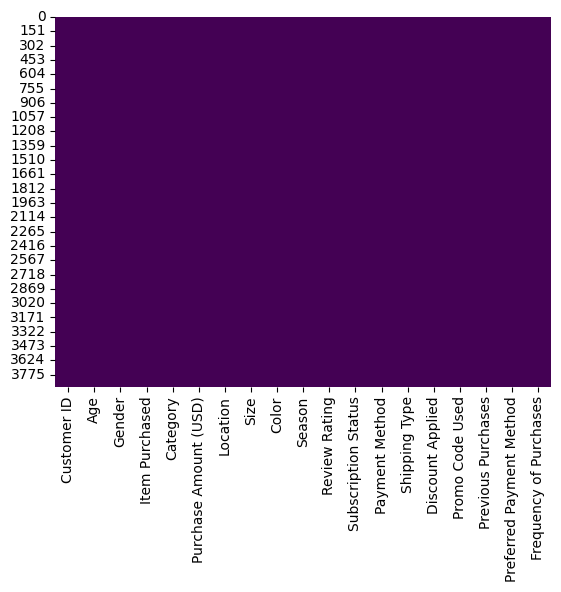

In [7]:
sns.heatmap(shopping_trends.isna(), cbar=False, cmap="viridis")
plt.show()

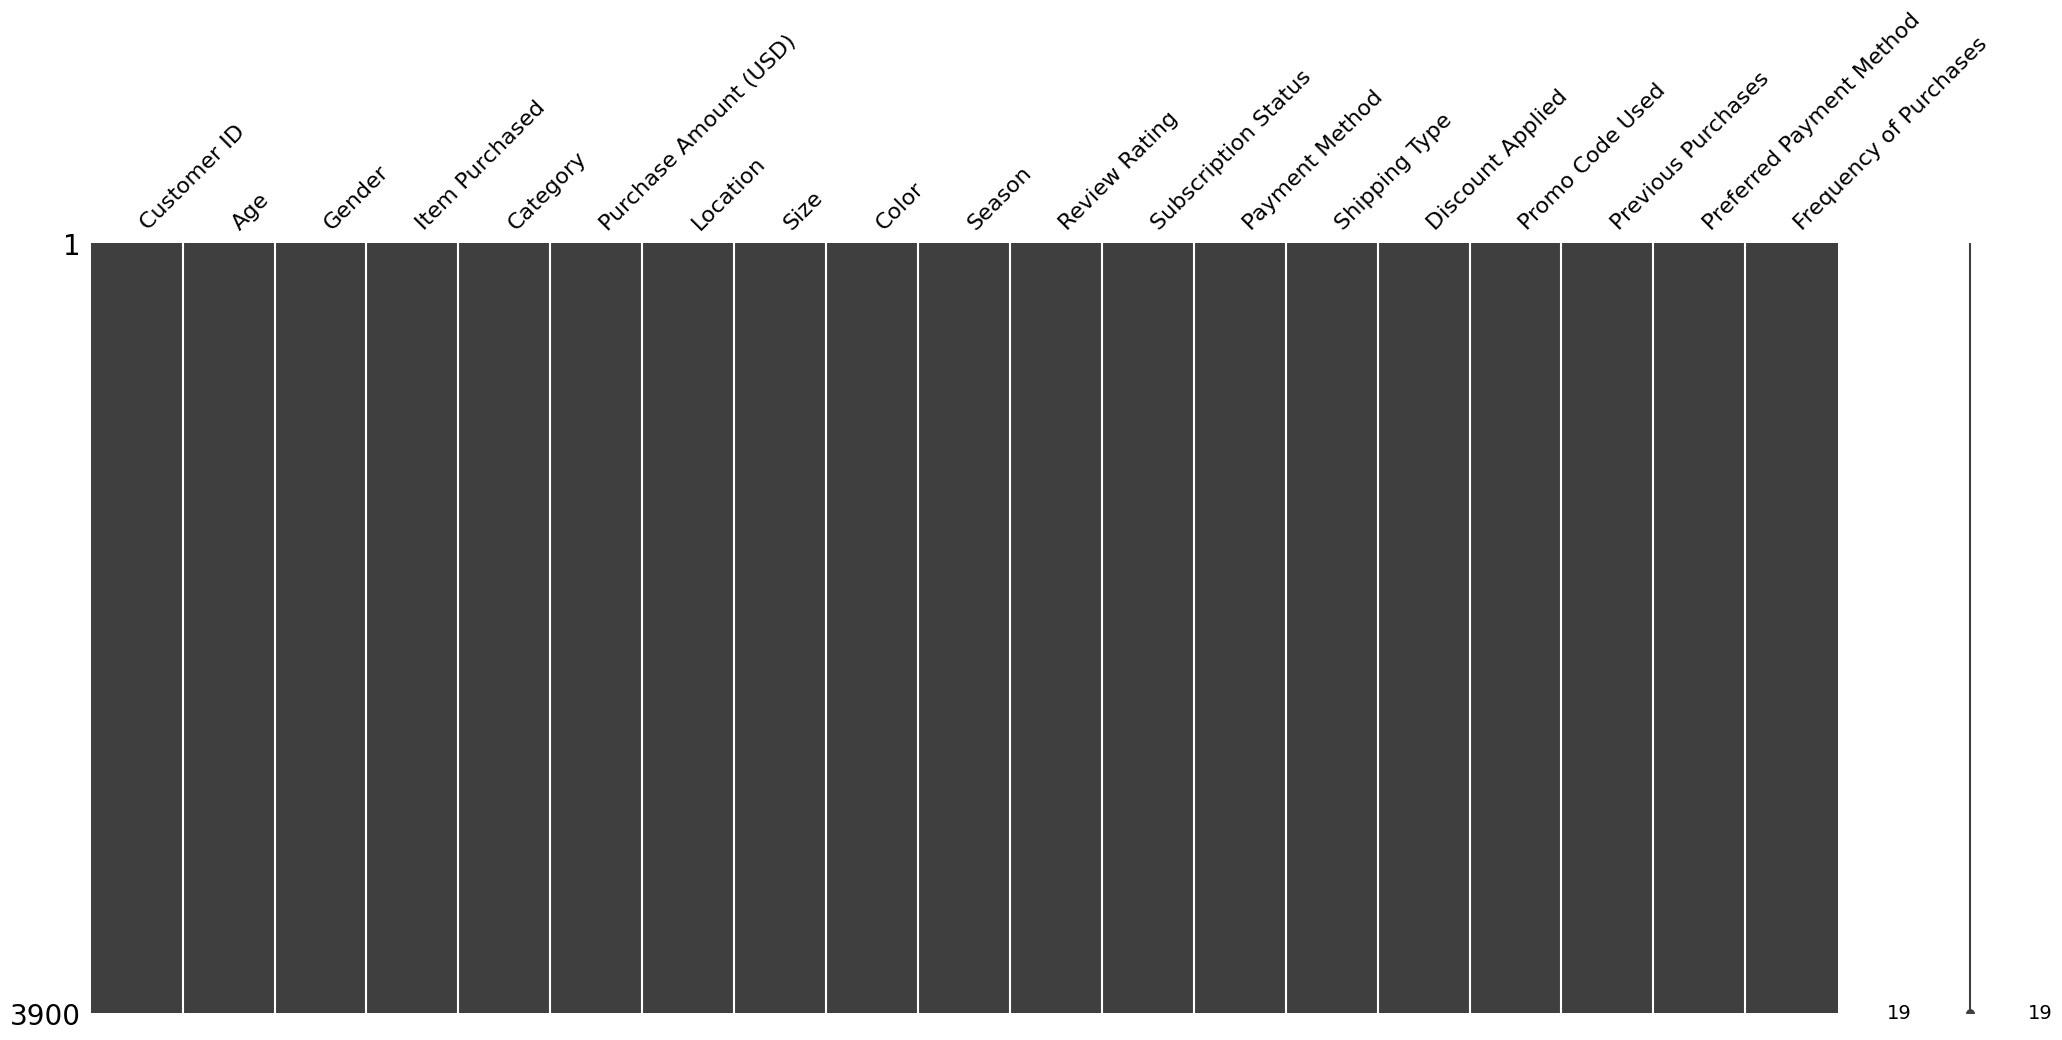

In [8]:
msno.matrix(shopping_trends)
plt.show()

<span style="color:blue; font-size:30px;">There are no missing or NAN values in the dataset</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [9]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

<span style="color:blue; font-size:30px;">Checking for formatting and spelling errors</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [10]:
categorical_columns = shopping_trends.select_dtypes(include=['object', 'category'])


for col in categorical_columns.columns:
    print(f"Unique values in column '{col}':")
    print(shopping_trends[col].unique())
    print("-" * 50)

Unique values in column 'Gender':
['Male' 'Female']
--------------------------------------------------
Unique values in column 'Item Purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
--------------------------------------------------
Unique values in column 'Category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
--------------------------------------------------
Unique values in column 'Location':
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 '

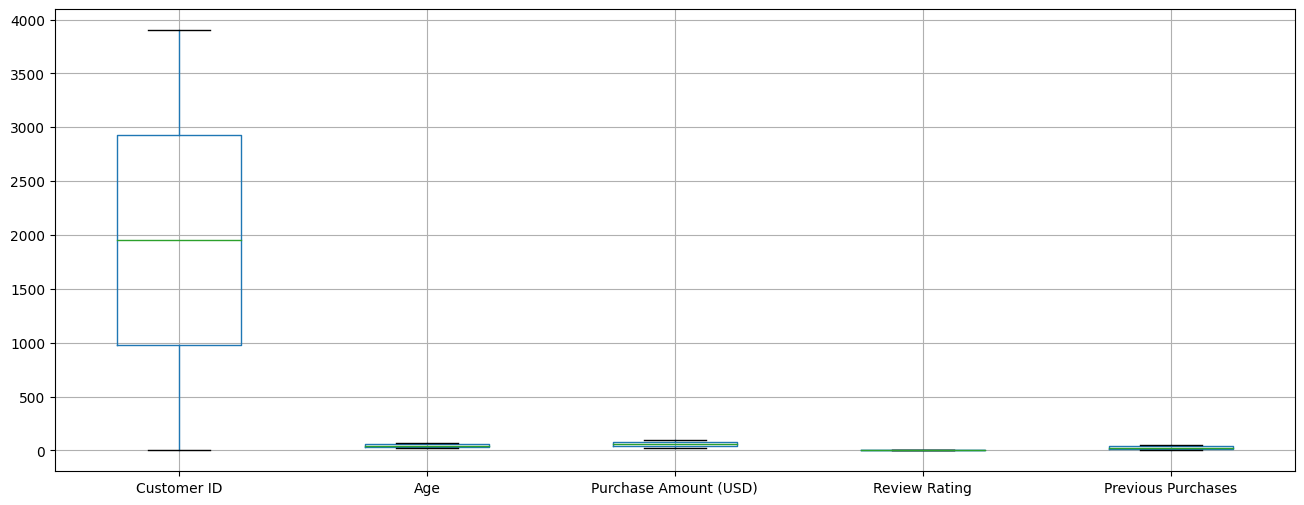

In [11]:
shopping_trends.boxplot(figsize=(16, 6))
plt.show()

In [12]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

<span style="color:blue; font-size:30px;">Checking for outliers</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [13]:
numerical_columns = shopping_trends.select_dtypes(include=['int64', 'float64'])

In [14]:
iso = IsolationForest(contamination=0.05)  # Specify contamination as the expected proportion of outliers
outliers = iso.fit_predict(numerical_columns)

# -1 indicates outlier
numerical_columns['Outlier'] = outliers
print(numerical_columns[numerical_columns['Outlier'] == -1])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


      Customer ID  Age  Purchase Amount (USD)  Review Rating  \
1               2   19                     64            3.1   
3               4   21                     90            3.5   
6               7   63                     85            3.2   
8               9   26                     97            2.6   
9              10   57                     31            4.8   
...           ...  ...                    ...            ...   
3877         3878   28                     96            4.2   
3882         3883   35                     95            2.6   
3884         3885   47                     29            4.9   
3887         3888   40                     34            2.7   
3891         3892   36                     30            4.7   

      Previous Purchases  Outlier  
1                      2       -1  
3                     49       -1  
6                     49       -1  
8                      8       -1  
9                      4       -1  
...            

<span style="color:blue; font-size:30px;">Though I found 195 ourliers, I will leave them in to examine the customer trends including greatest sales</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [15]:
mapping = {'Yes': 0, 'No': 1}
shopping_trends['Discount Applied'] = shopping_trends['Discount Applied'].map(mapping)
shopping_trends['Promo Code Used'] = shopping_trends['Promo Code Used'].map(mapping)


In [16]:
mapping = {'Male': 0, 'Female': 1}
shopping_trends['Gender'] = shopping_trends['Gender'].map(mapping)

In [17]:
shopping_trends

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,0,0,14,Venmo,Fortnightly
1,2,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,0,0,2,Cash,Fortnightly
2,3,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,0,0,23,Credit Card,Weekly
3,4,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,0,0,49,PayPal,Weekly
4,5,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,0,0,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,1,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,1,1,32,Venmo,Weekly
3896,3897,52,1,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,1,1,41,Bank Transfer,Bi-Weekly
3897,3898,46,1,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,1,1,24,Venmo,Quarterly
3898,3899,44,1,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,1,1,24,Venmo,Weekly


<span style="color:blue; font-size:30px;">Visualizing the data</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

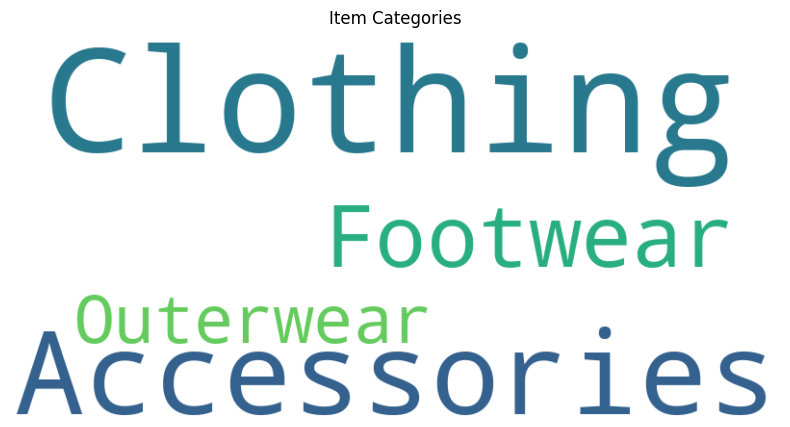

In [18]:
all_items = ' '.join(shopping_trends['Category'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150, max_words=100).generate(all_items)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Item Categories')
plt.axis('off')  
plt.show()

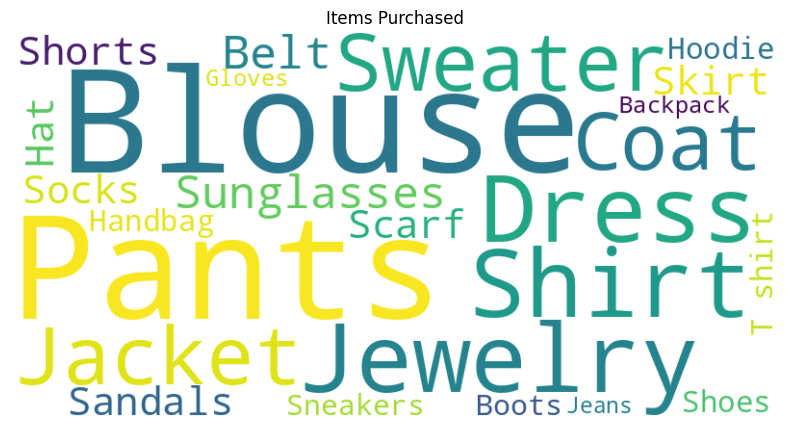

In [19]:
all_items = ' '.join(shopping_trends['Item Purchased'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150, max_words=100).generate(all_items)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Items Purchased')
plt.axis('off')  
plt.show()

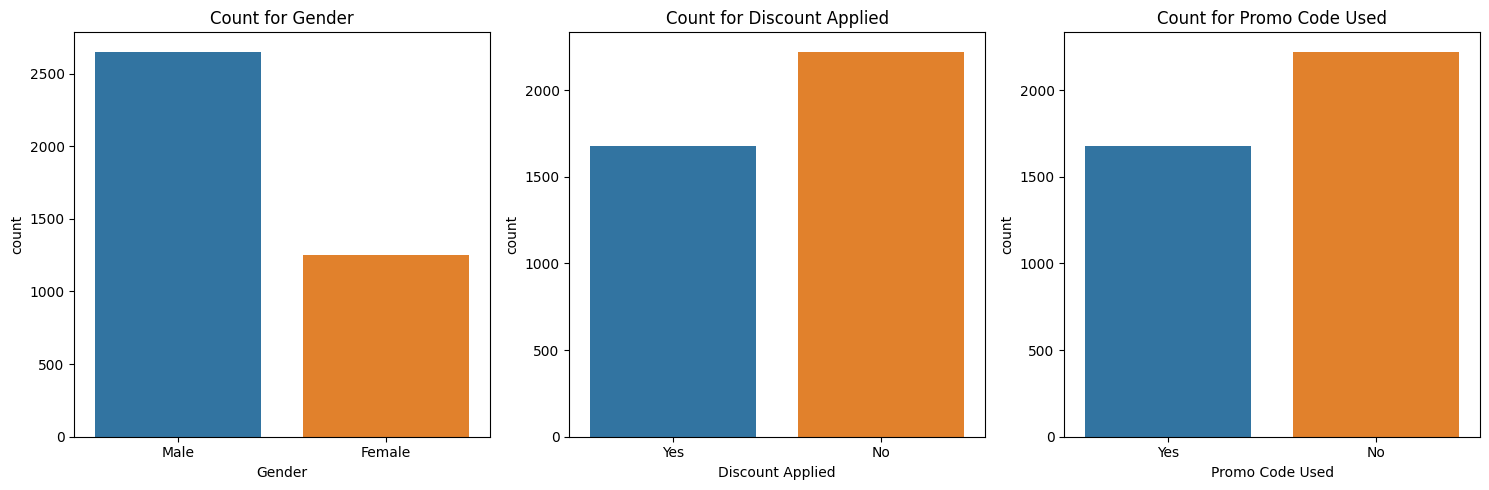

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Gender', data=shopping_trends, ax=axes[0])
axes[0].set_title('Count for Gender')
axes[0].set_xticklabels(['Male', 'Female'])  # Set x-axis tick labels

sns.countplot(x='Discount Applied', data=shopping_trends, ax=axes[1])
axes[1].set_title('Count for Discount Applied')
axes[1].set_xticklabels(['Yes', 'No'])  # Set x-axis tick labels

sns.countplot(x='Promo Code Used', data=shopping_trends, ax=axes[2])
axes[2].set_title('Count for Promo Code Used')
axes[2].set_xticklabels(['Yes', 'No'])  # Set x-axis tick labels

plt.tight_layout()

plt.show()

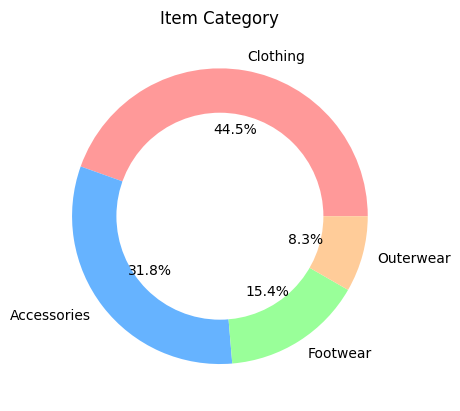

In [21]:
category_counts = shopping_trends['Category'].value_counts()

custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Item Category')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

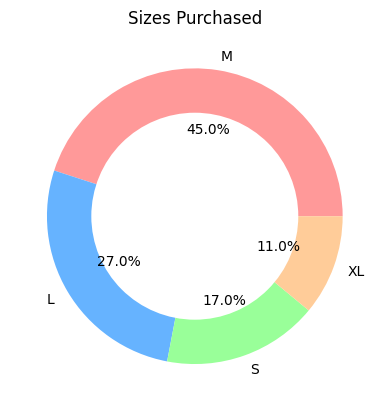

In [22]:
category_counts = shopping_trends['Size'].value_counts()

custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Sizes Purchased')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.show()

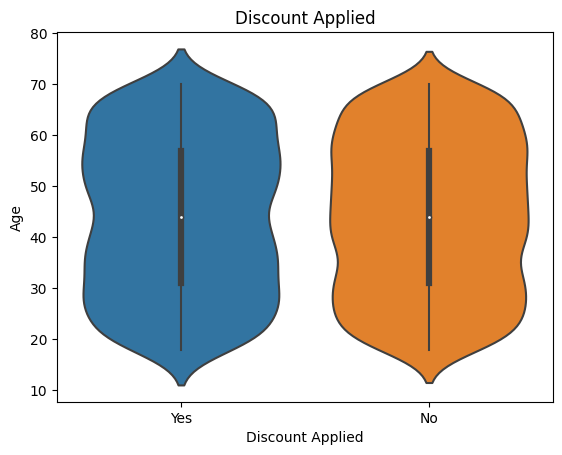

In [23]:
sns.violinplot(x='Discount Applied', y='Age', data=shopping_trends)

plt.xticks([0, 1], ['Yes', 'No'])

plt.title('Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Age')

plt.show()

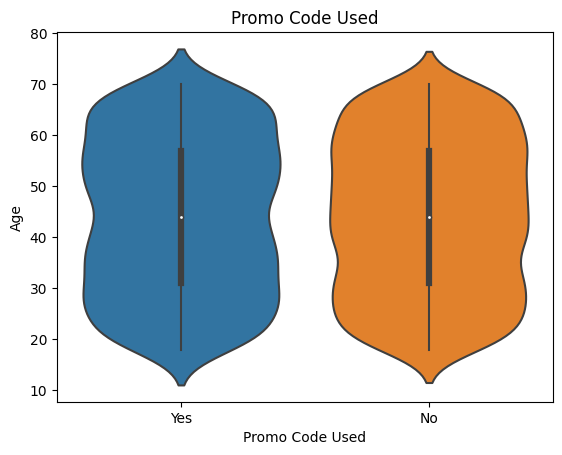

In [24]:
sns.violinplot(x='Promo Code Used', y='Age', data=shopping_trends)

plt.xticks([0, 1], ['Yes', 'No'])

plt.title('Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Age')

plt.show()

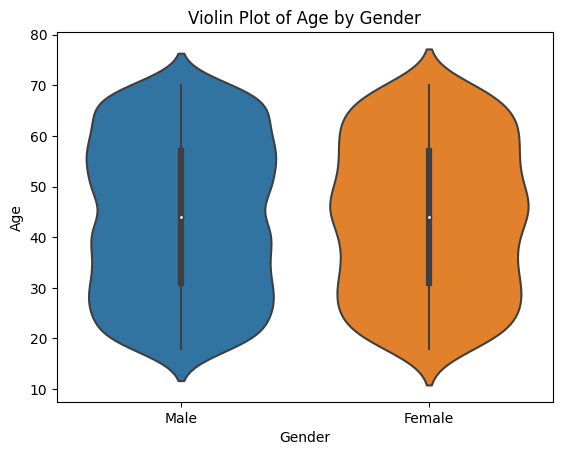

In [25]:
sns.violinplot(x='Gender', y='Age', data=shopping_trends)

plt.xticks([0, 1], ['Male', 'Female'])

plt.title('Violin Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

In [26]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,0,0,14,Venmo,Fortnightly
1,2,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,0,0,2,Cash,Fortnightly
2,3,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,0,0,23,Credit Card,Weekly
3,4,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,0,0,49,PayPal,Weekly
4,5,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,0,0,31,PayPal,Annually


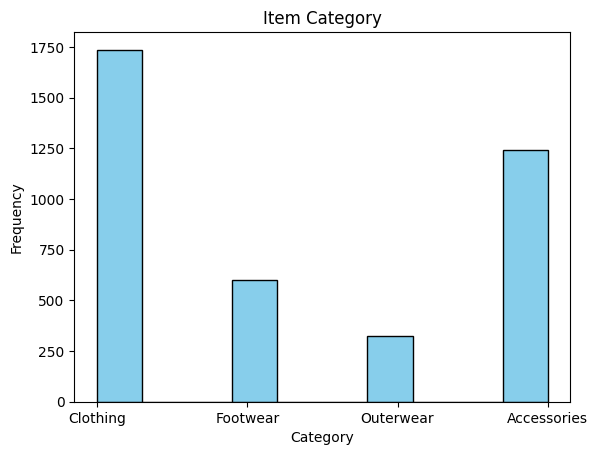

In [27]:
plt.hist(shopping_trends['Category'], bins=10, color='skyblue', edgecolor='black')

plt.title('Item Category')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.show()

In [28]:
unique_counts = shopping_trends['Location'].value_counts()
print(unique_counts)

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

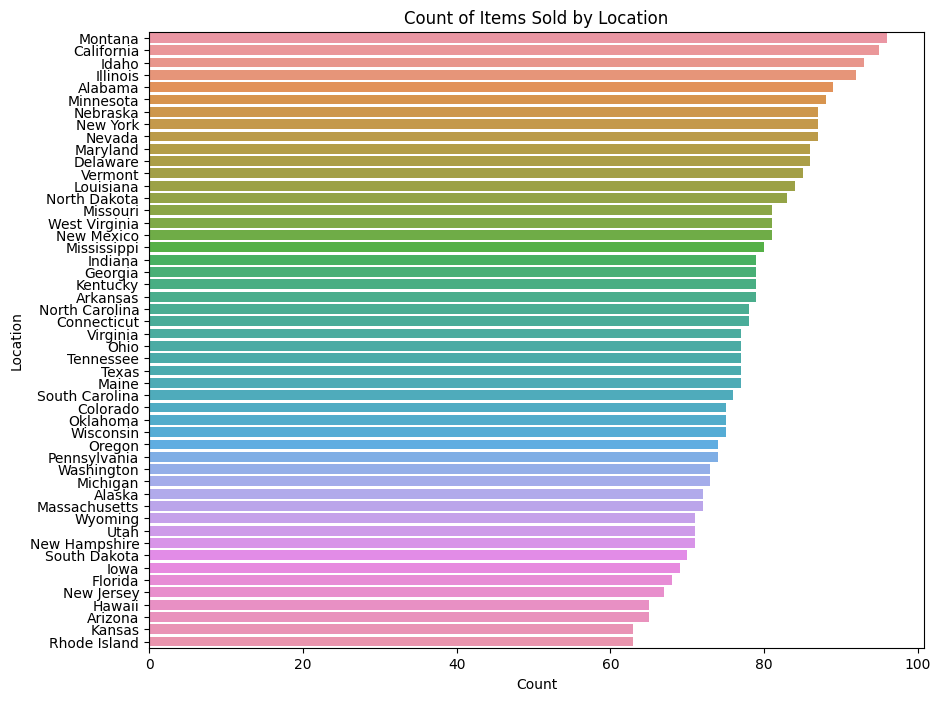

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Location', data=shopping_trends, order=shopping_trends['Location'].value_counts().index)
plt.title('Count of Items Sold by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

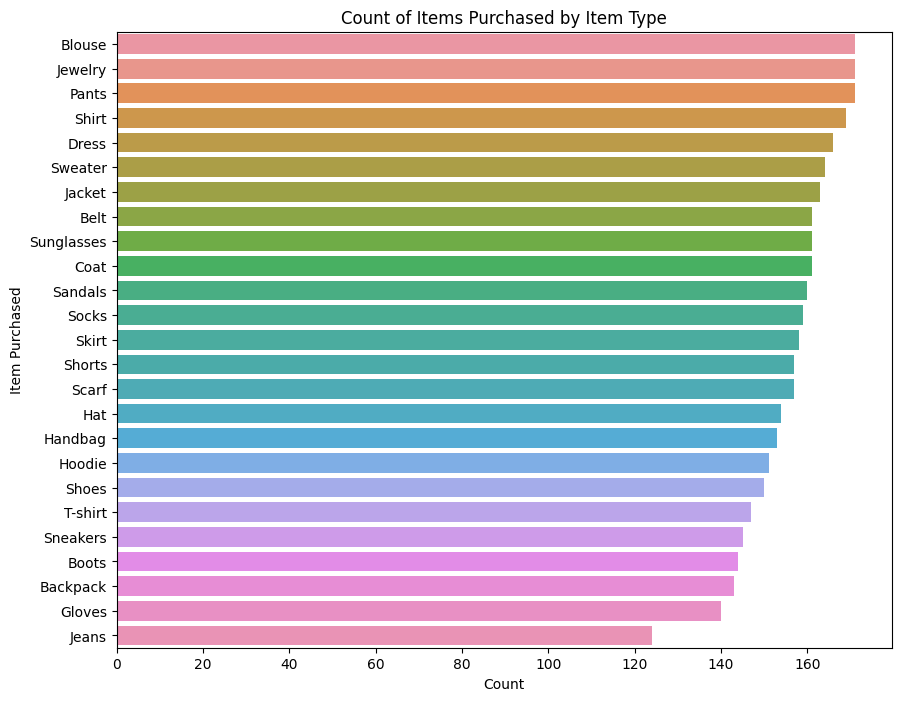

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Item Purchased', data=shopping_trends, order=shopping_trends['Item Purchased'].value_counts().index)
plt.title('Count of Items Purchased by Item Type')
plt.xlabel('Count')
plt.ylabel('Item Purchased')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


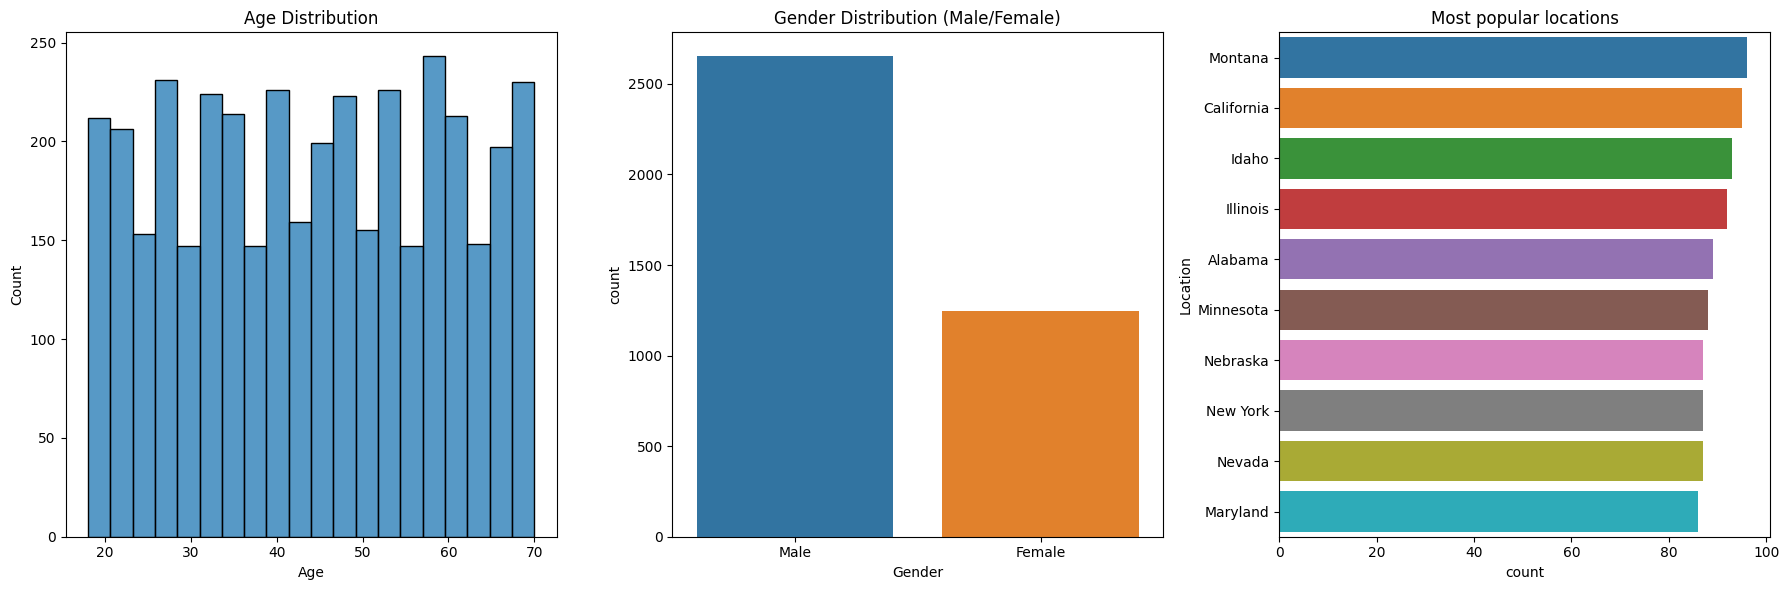

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=shopping_trends, x='Age', bins=20, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.countplot(data=shopping_trends, x='Gender', ax=axes[1])
axes[1].set_title('Gender Distribution (Male/Female)')
axes[1].set_xticklabels(['Male', 'Female']) 

sns.countplot(data=shopping_trends, y='Location', ax=axes[2], order=shopping_trends['Location'].value_counts().index[:10])
axes[2].set_title('Most popular locations')
axes[2].set_ylabel('Location')

plt.tight_layout()

plt.show()

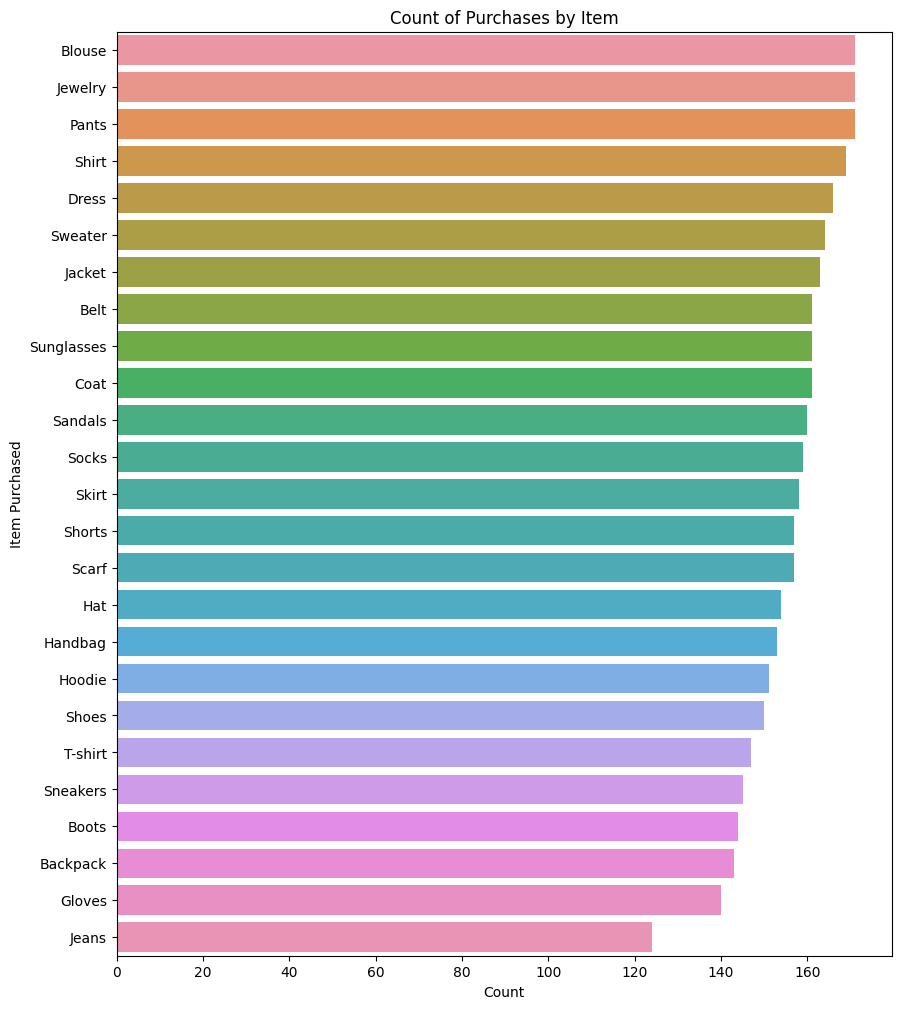

In [32]:
plt.figure(figsize=(10, 12))  
sns.countplot(y='Item Purchased', data=shopping_trends, order=shopping_trends['Item Purchased'].value_counts().index)
plt.title('Count of Purchases by Item')
plt.xlabel('Count')
plt.ylabel('Item Purchased')
plt.show()

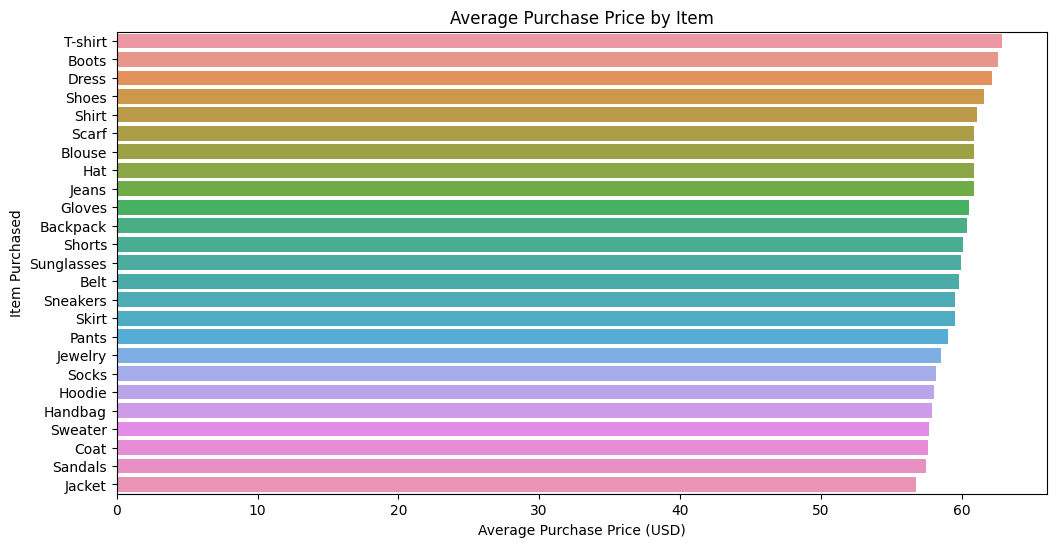

In [33]:
average_purchase_amount = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].mean().reset_index()

average_purchase_amount = average_purchase_amount.sort_values(by='Purchase Amount (USD)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Purchase Amount (USD)', y='Item Purchased', data=average_purchase_amount)
plt.title('Average Purchase Price by Item')
plt.xlabel('Average Purchase Price (USD)')
plt.ylabel('Item Purchased')
plt.show()

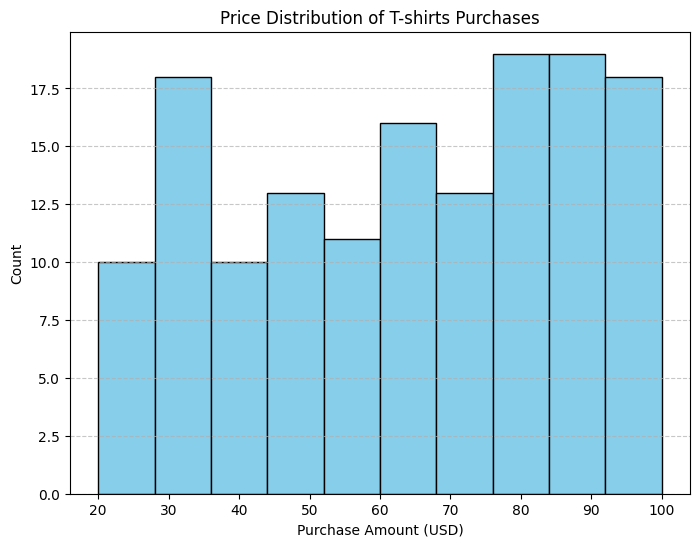

In [34]:
tshirts_data = shopping_trends[shopping_trends['Item Purchased'] == 'T-shirt']

plt.figure(figsize=(8, 6))
plt.hist(tshirts_data['Purchase Amount (USD)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Price Distribution of T-shirts Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()

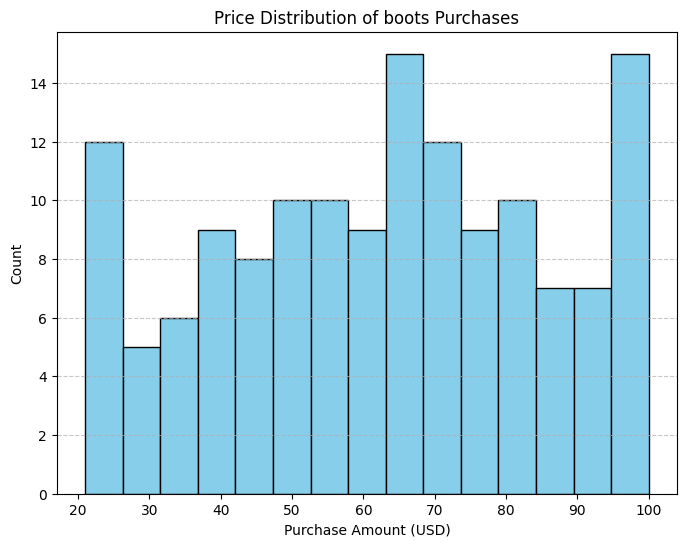

In [35]:
tshirts_data = shopping_trends[shopping_trends['Item Purchased'] == 'Boots']

plt.figure(figsize=(8, 6))
plt.hist(tshirts_data['Purchase Amount (USD)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Price Distribution of boots Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [36]:
variance_by_item = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].var()

item_with_max_variance = variance_by_item.idxmax()
max_variance = variance_by_item.max()

print("Item with the biggest variance in price:", item_with_max_variance)
print("Variance:", max_variance)

Item with the biggest variance in price: Jewelry
Variance: 624.4500171998625


<font color='white' size=4>**<span style='background:blue'> Jewelry had the greatest variance in price </span>**</font>

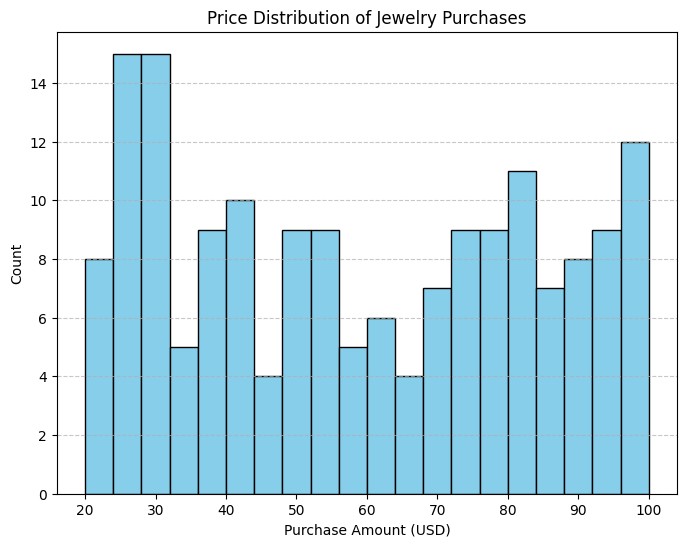

In [37]:
tshirts_data = shopping_trends[shopping_trends['Item Purchased'] == 'Jewelry']

plt.figure(figsize=(8, 6))
plt.hist(tshirts_data['Purchase Amount (USD)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Jewelry Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()

In [38]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,0,0,14,Venmo,Fortnightly
1,2,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,0,0,2,Cash,Fortnightly
2,3,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,0,0,23,Credit Card,Weekly
3,4,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,0,0,49,PayPal,Weekly
4,5,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,0,0,31,PayPal,Annually


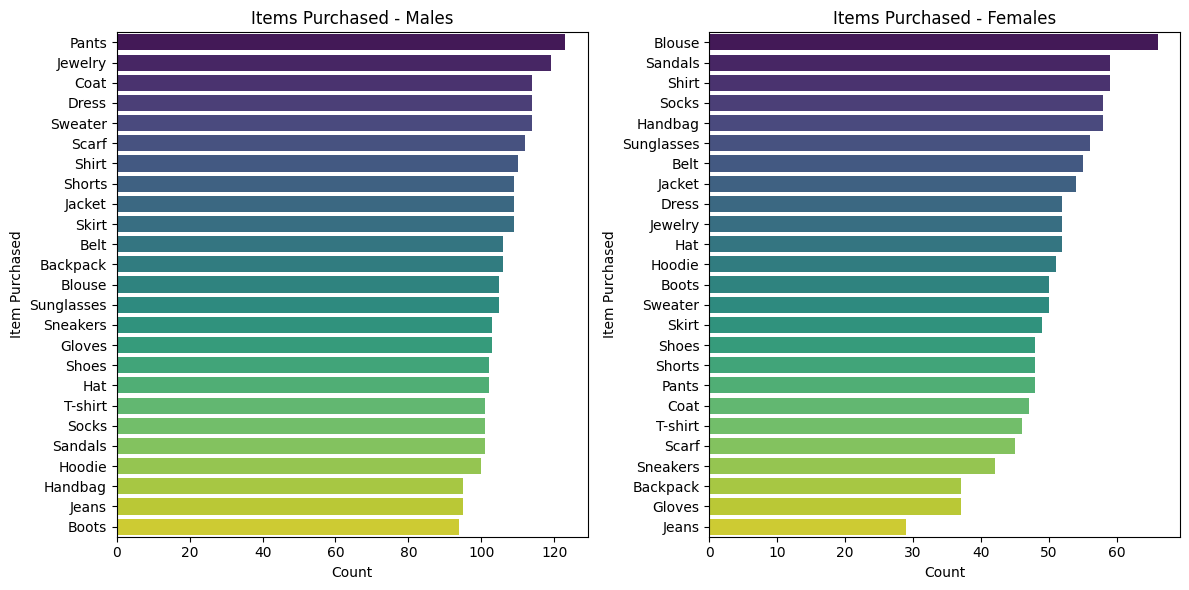

In [39]:
male_purchases = shopping_trends[shopping_trends['Gender'] == 0]
female_purchases = shopping_trends[shopping_trends['Gender'] == 1]

male_item_counts = male_purchases['Item Purchased'].value_counts()
female_item_counts = female_purchases['Item Purchased'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=male_item_counts.values, y=male_item_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Items Purchased - Males')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Item Purchased')

sns.barplot(x=female_item_counts.values, y=female_item_counts.index, ax=axes[1], palette='viridis')
axes[1].set_title('Items Purchased - Females')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Item Purchased')

plt.tight_layout()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/

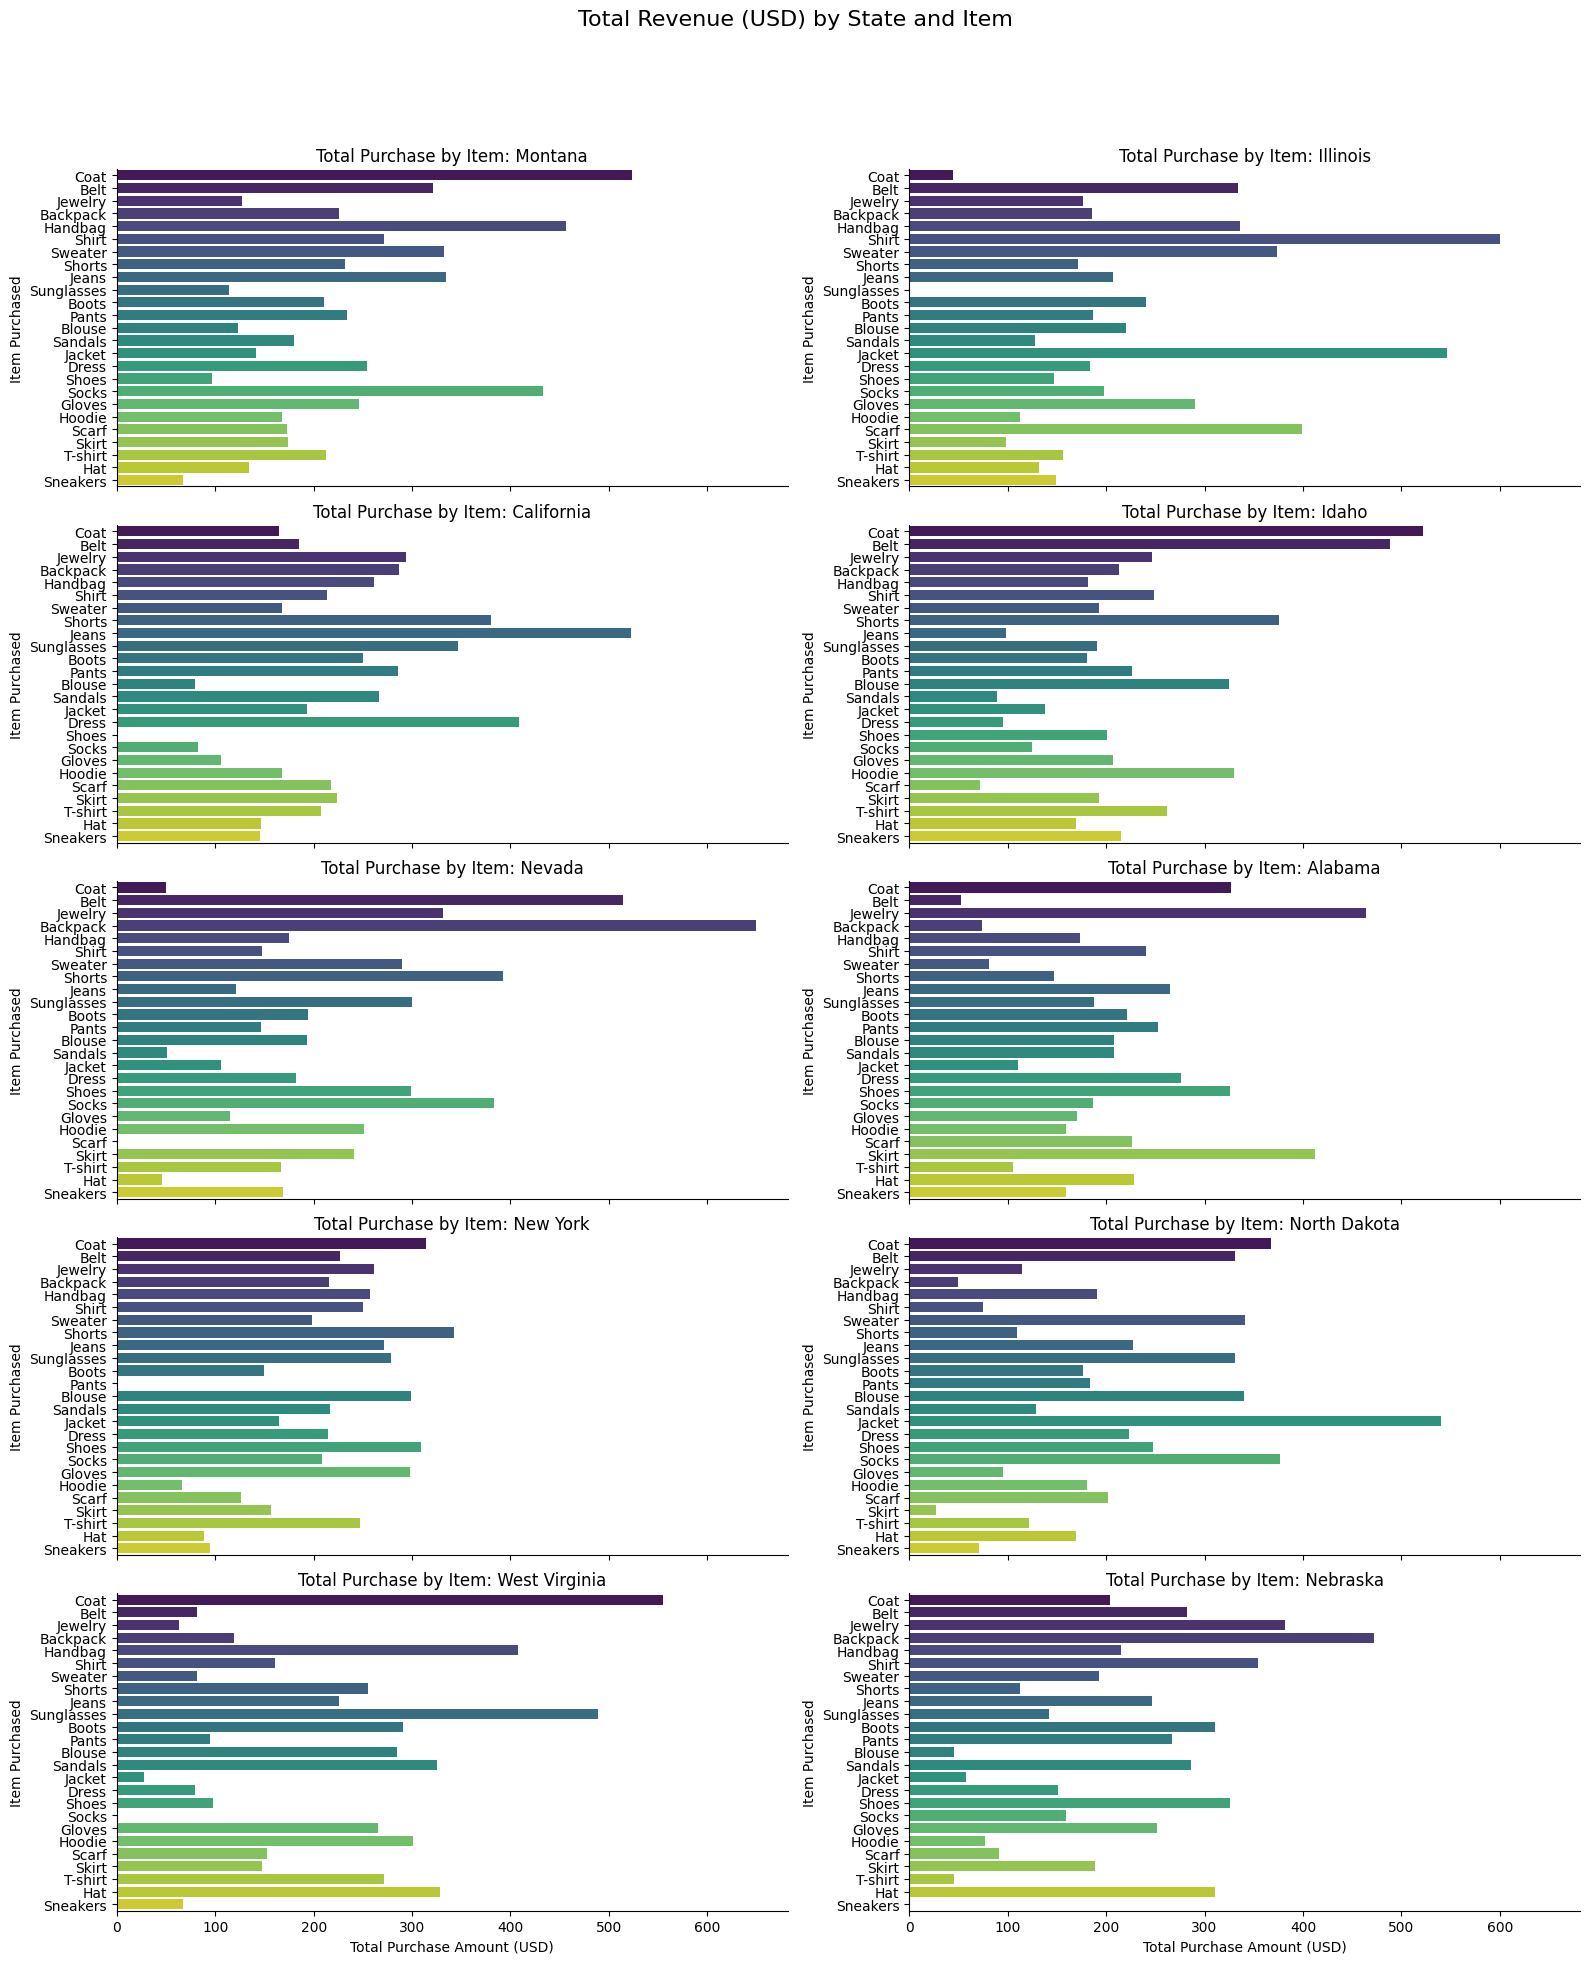

In [40]:

top_10_states = shopping_trends.groupby('Location')['Purchase Amount (USD)'].sum().nlargest(10).index
top_10_data = shopping_trends[shopping_trends['Location'].isin(top_10_states)]


g = sns.FacetGrid(top_10_data, col='Location', col_wrap=2, col_order=top_10_states, height=4, aspect=2, sharex=True, sharey=False)


g.map_dataframe(
    sns.barplot,
    x='Purchase Amount (USD)',
    y='Item Purchased',
    estimator=sum,
    ci=None,
    palette='viridis',
    order=top_10_data['Item Purchased'].value_counts().index
)


for ax, state in zip(g.axes.flat, top_10_states):
    ax.set_title(f'Total Purchase by Item: {state}')
    ax.set_xlabel('Total Purchase Amount (USD)')
    ax.set_ylabel('Item Purchased')


g.tight_layout()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total Revenue (USD) by State and Item', fontsize=16)
plt.show()


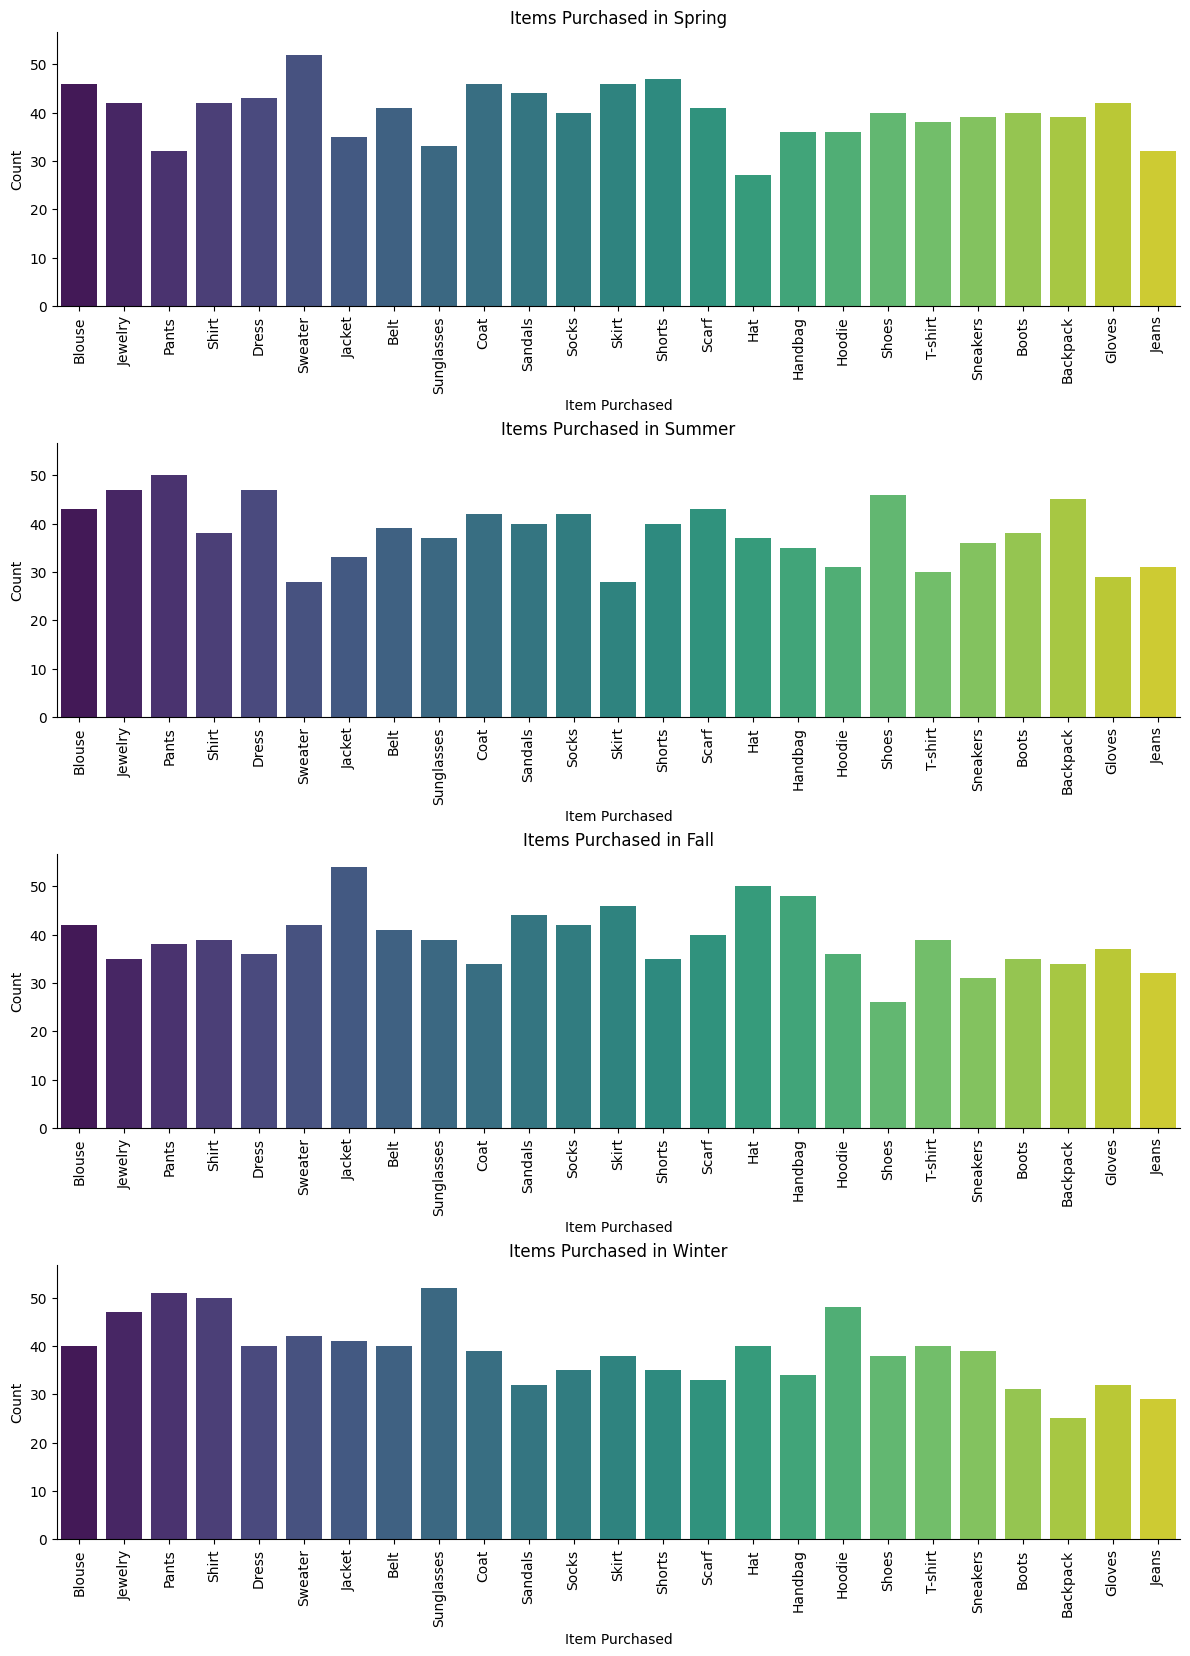

In [41]:
# Define the order of seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Define the order of item types
item_order = shopping_trends['Item Purchased'].value_counts().index

# Convert 'Season' to categorical data type with the specified order
shopping_trends['Season'] = pd.Categorical(shopping_trends['Season'], categories=season_order, ordered=True)

# Create the FacetGrid with rows for each season
g = sns.FacetGrid(shopping_trends, row='Season', height=4, aspect=3, sharex=False)

# Map a countplot of 'Item Purchased' to each facet, specifying the order of item types
g.map(sns.countplot, 'Item Purchased', palette='viridis', order=item_order)

# Set titles for each facet
for ax, season in zip(g.axes.flat, season_order):
    ax.set_title(f'Items Purchased in {season}')
    ax.set_xlabel('Item Purchased')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()

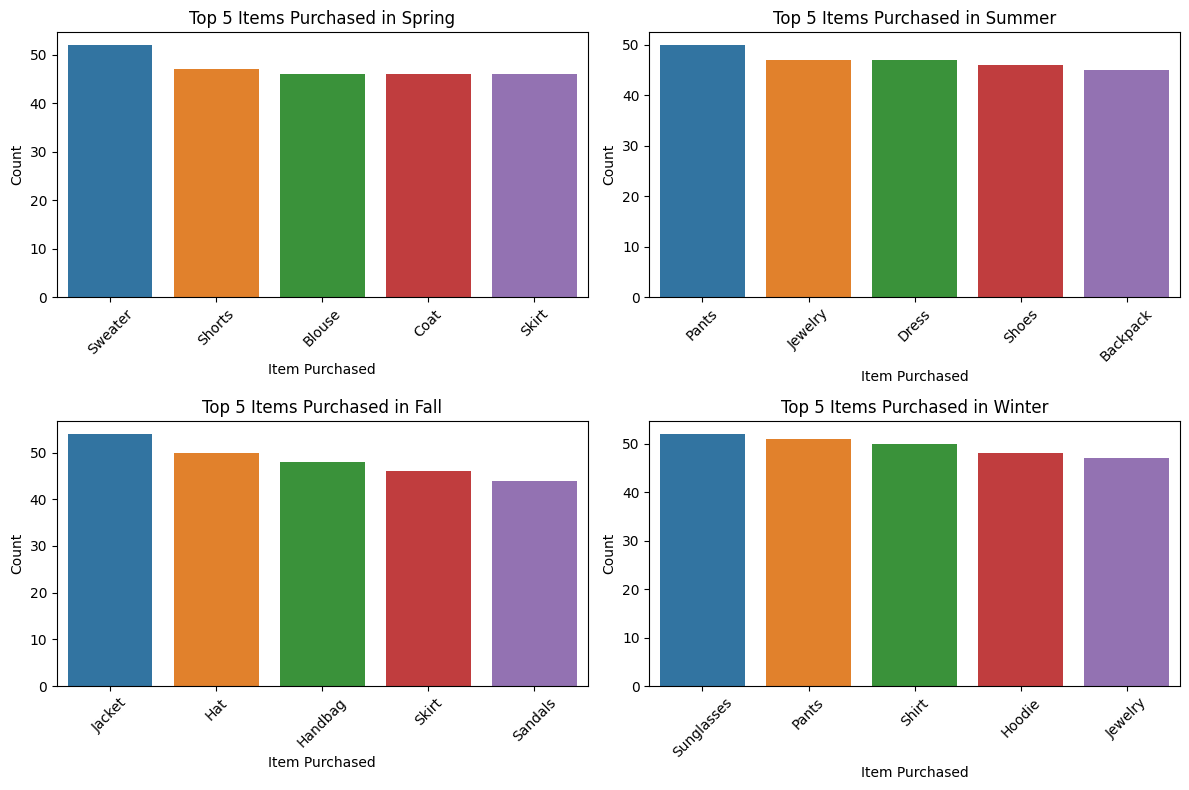

In [42]:
def get_top_items(df, season_column, item_column, n=5):
    top_items = {}
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']  # Define the order of seasons
    for season in season_order:
        season_data = df[df[season_column] == season]
        top_items[season] = season_data[item_column].value_counts().head(n).index.tolist()
    return top_items

top_items_season = get_top_items(shopping_trends, 'Season', 'Item Purchased', n=5)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

for i, (season, items) in enumerate(top_items_season.items()):
    season_data = shopping_trends[shopping_trends['Season'] == season]
    top_items_data = season_data[season_data['Item Purchased'].isin(items)]
    sns.countplot(x='Item Purchased', data=top_items_data, order=items, ax=axes[i])
    axes[i].set_title(f'Top 5 Items Purchased in {season}')
    axes[i].set_xlabel('Item Purchased')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


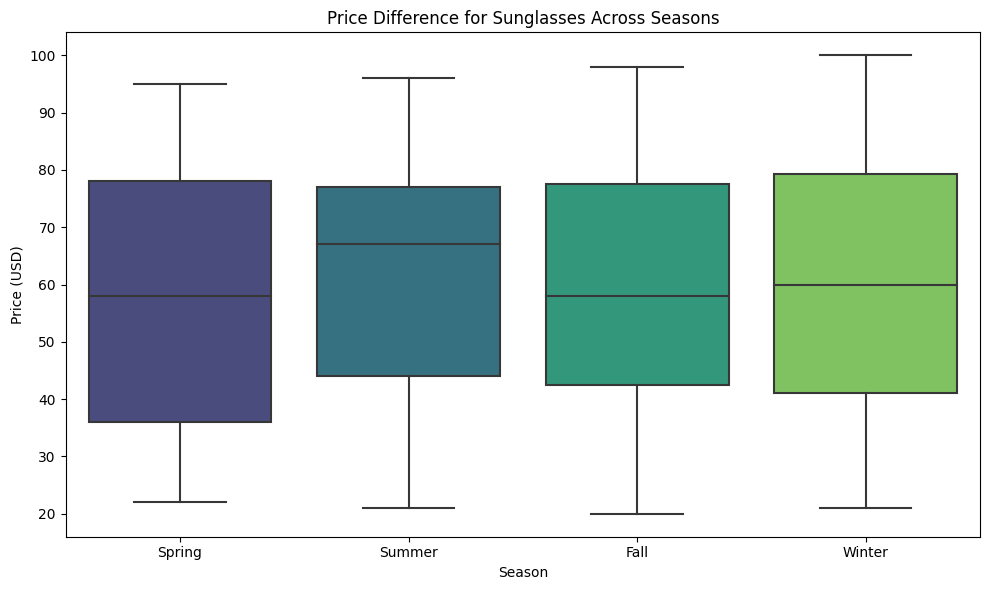

In [43]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

shopping_trends['Season'] = pd.Categorical(shopping_trends['Season'], categories=season_order, ordered=True)

sunglasses_data = shopping_trends[shopping_trends['Item Purchased'] == 'Sunglasses']

sunglasses_data_cleaned = sunglasses_data.dropna(subset=['Purchase Amount (USD)'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=sunglasses_data_cleaned, palette='viridis')

plt.title('Price Difference for Sunglasses Across Seasons')
plt.xlabel('Season')
plt.ylabel('Price (USD)')
plt.tight_layout()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


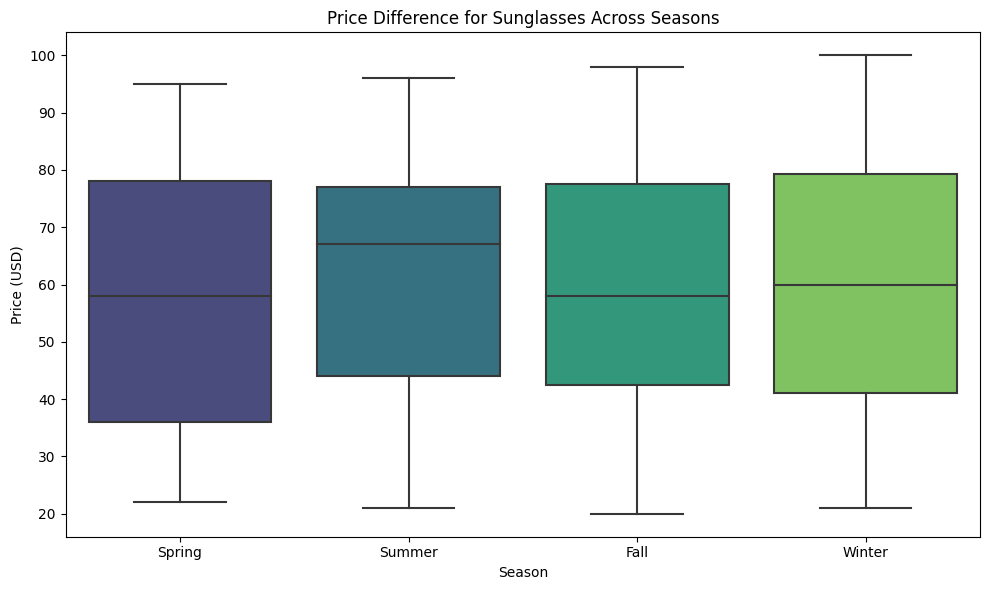

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=sunglasses_data_cleaned, order=season_order, palette='viridis')

# Set titles and labels
plt.title('Price Difference for Sunglasses Across Seasons')
plt.xlabel('Season')
plt.ylabel('Price (USD)')
plt.tight_layout()

plt.show()

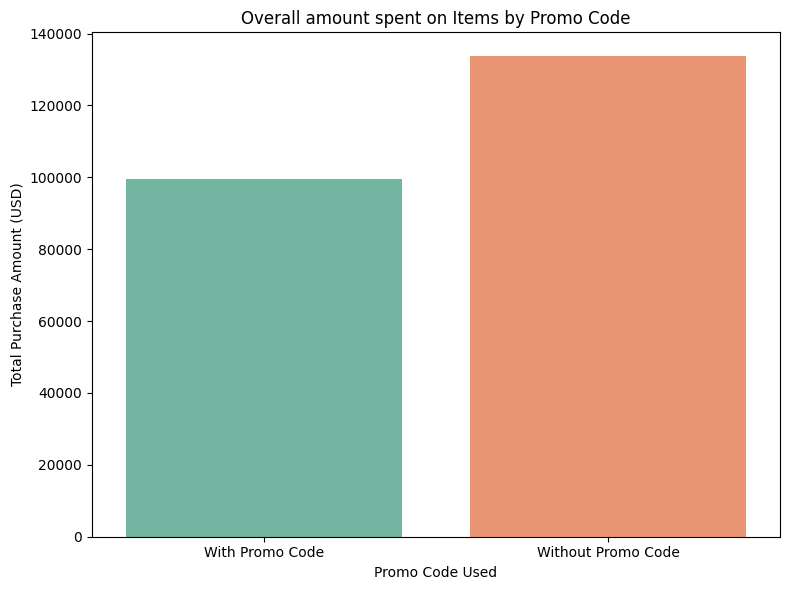

In [45]:
purchase_amounts = shopping_trends.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=purchase_amounts, palette='Set2')
plt.title('Overall amount spent on Items by Promo Code')
plt.xlabel('Promo Code Used')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(ticks=[0, 1], labels=['With Promo Code', 'Without Promo Code'])
plt.tight_layout()

plt.show()

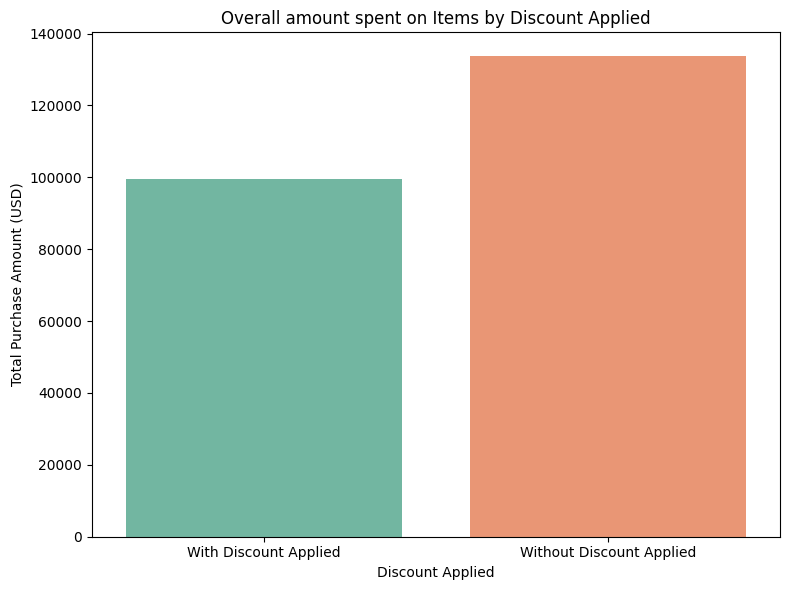

In [46]:
purchase_amounts = shopping_trends.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=purchase_amounts, palette='Set2')
plt.title('Overall amount spent on Items by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(ticks=[0, 1], labels=['With Discount Applied', 'Without Discount Applied'])
plt.tight_layout()

plt.show()

<span style="color:blue; font-size:30px;">Seasonal Trends</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

/tmp/ipykernel_455/3494518467.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_totals = shopping_trends.groupby('Season')['Purchase Amount (USD)'].sum()


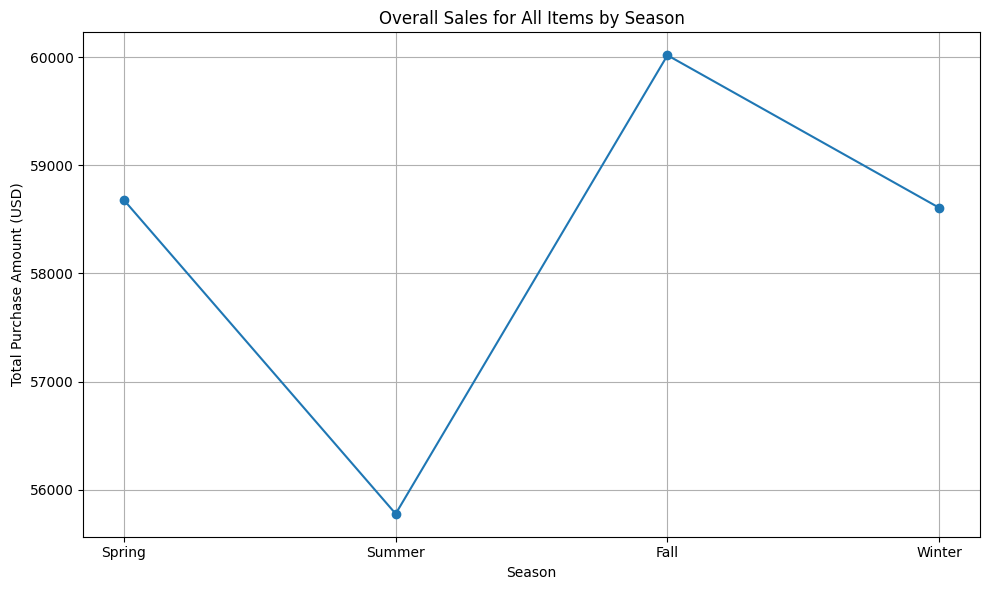

In [47]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

seasonal_totals = shopping_trends.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(season_order, seasonal_totals.reindex(season_order), marker='o', linestyle='-')
plt.title('Overall Sales for All Items by Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_455/680447877.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sunglasses_totals = sunglasses_data.groupby('Season')['Purchase Amount (USD)'].sum()


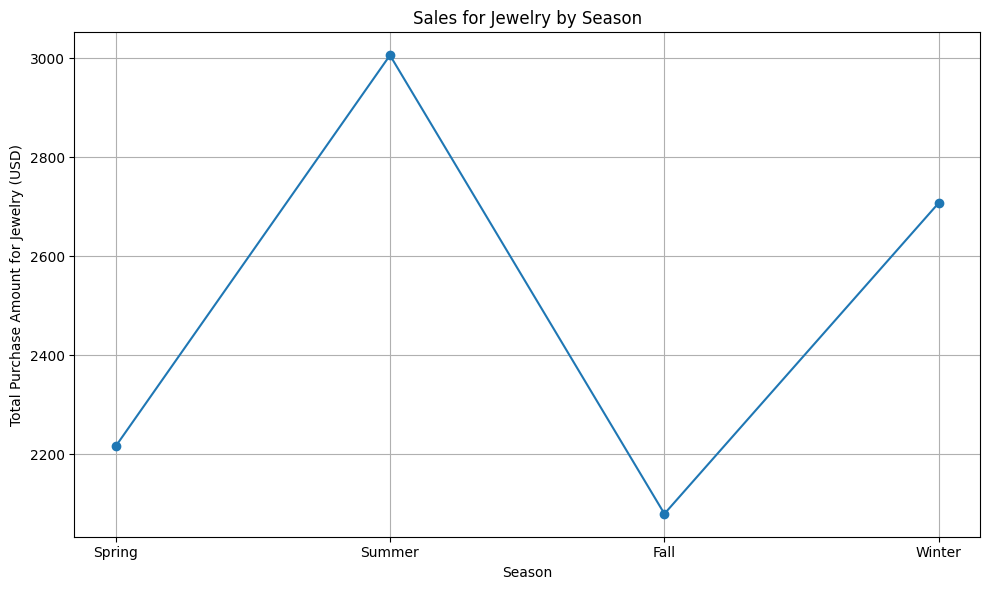

In [48]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

sunglasses_data = shopping_trends[shopping_trends['Item Purchased'] == 'Jewelry']

seasonal_sunglasses_totals = sunglasses_data.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(season_order, seasonal_sunglasses_totals.reindex(season_order), marker='o', linestyle='-')
plt.title('Sales for Jewelry by Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount for Jewelry (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


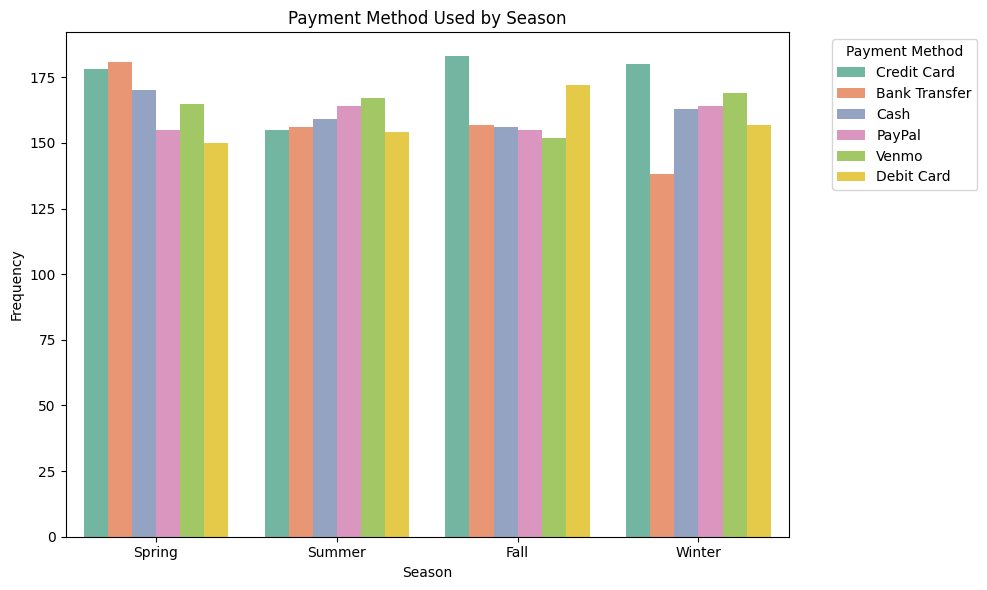

In [49]:

season_order = ['Spring', 'Summer', 'Fall', 'Winter']


plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Payment Method', data=shopping_trends, palette='Set2', order=season_order)
plt.title('Payment Method Used by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

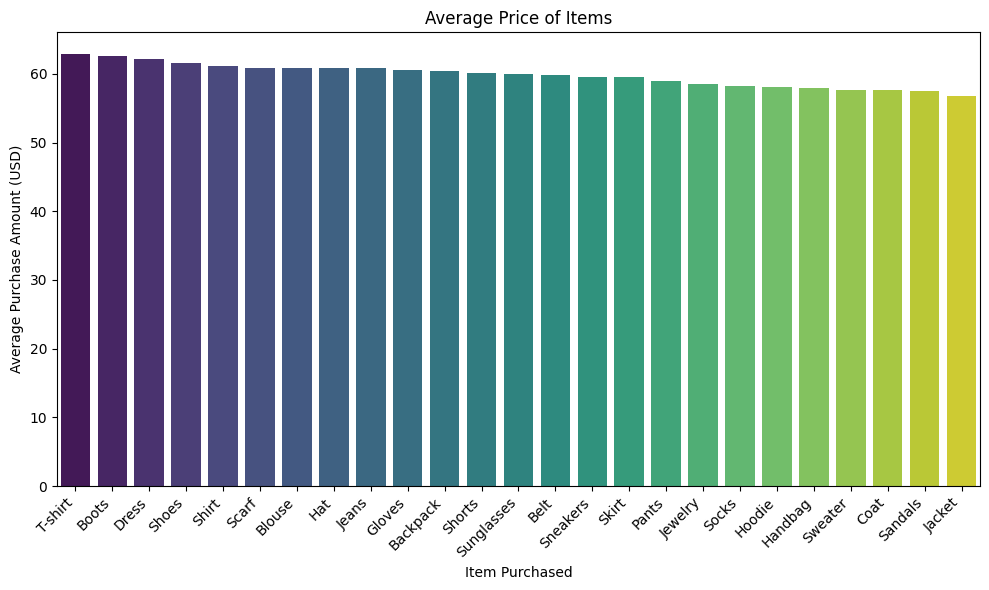

In [50]:
average_price_per_item = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].mean().reset_index()

average_price_per_item_sorted = average_price_per_item.sort_values(by='Purchase Amount (USD)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=average_price_per_item_sorted, palette='viridis')
plt.title('Average Price of Items')
plt.xlabel('Item Purchased')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [51]:
spring_data = shopping_trends[shopping_trends['Season'] == 'Spring']
winter_data = shopping_trends[shopping_trends['Season'] == 'Winter']

average_price_spring = spring_data['Purchase Amount (USD)'].mean()
average_price_winter = winter_data['Purchase Amount (USD)'].mean()

average_price_increase = average_price_winter - average_price_spring

print("Average price increase from Spring to Winter:", average_price_increase)

Average price increase from Spring to Winter: 1.6196258050017036


<font color='white' size=4>**<span style='background:blue'> Items had an average price increase of $1.62 </span>**</font>

In [52]:
spring_data = shopping_trends[shopping_trends['Season'] == 'Spring']
winter_data = shopping_trends[shopping_trends['Season'] == 'Winter']

average_price_per_item_spring = spring_data.groupby('Item Purchased')['Purchase Amount (USD)'].mean()

average_price_per_item_winter = winter_data.groupby('Item Purchased')['Purchase Amount (USD)'].mean()

average_price_change_per_item = average_price_per_item_winter - average_price_per_item_spring

print("Average price change from Spring to Winter per item:")
print(average_price_change_per_item)

Average price change from Spring to Winter per item:
Item Purchased
Backpack      9.115897
Belt          4.762805
Blouse       -1.914130
Boots         5.622581
Coat          2.556299
Dress         3.049419
Gloves        3.775298
Handbag       5.310458
Hat          -2.860185
Hoodie       -1.152778
Jacket        1.634843
Jeans         4.425647
Jewelry       4.855117
Pants        -4.602328
Sandals       6.818182
Scarf         6.229860
Shirt        -1.507619
Shoes        -4.461842
Shorts        3.325228
Skirt         3.629291
Sneakers      0.666667
Socks         1.500000
Sunglasses    1.629953
Sweater      -4.171245
T-shirt      -3.172368
Name: Purchase Amount (USD), dtype: float64


<font color='white' size=4>**<span style='background:blue'> Backpacks had the greatest average price change from spring to winter, an increase of over nine dollars </span>**</font>

In [53]:
average_price_per_season = shopping_trends.groupby('Season')['Purchase Amount (USD)'].mean()

lowest_price_season = average_price_per_season.idxmin()

lowest_average_price = average_price_per_season.min()

print(f"The season with the lowest average prices is {lowest_price_season} with an average price of ${lowest_average_price:.2f}")

The season with the lowest average prices is Summer with an average price of $58.41


/tmp/ipykernel_455/974516700.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_per_season = shopping_trends.groupby('Season')['Purchase Amount (USD)'].mean()


<font color='white' size=4>**<span style='background:blue'> Summer had the lowest average price </span>**</font>

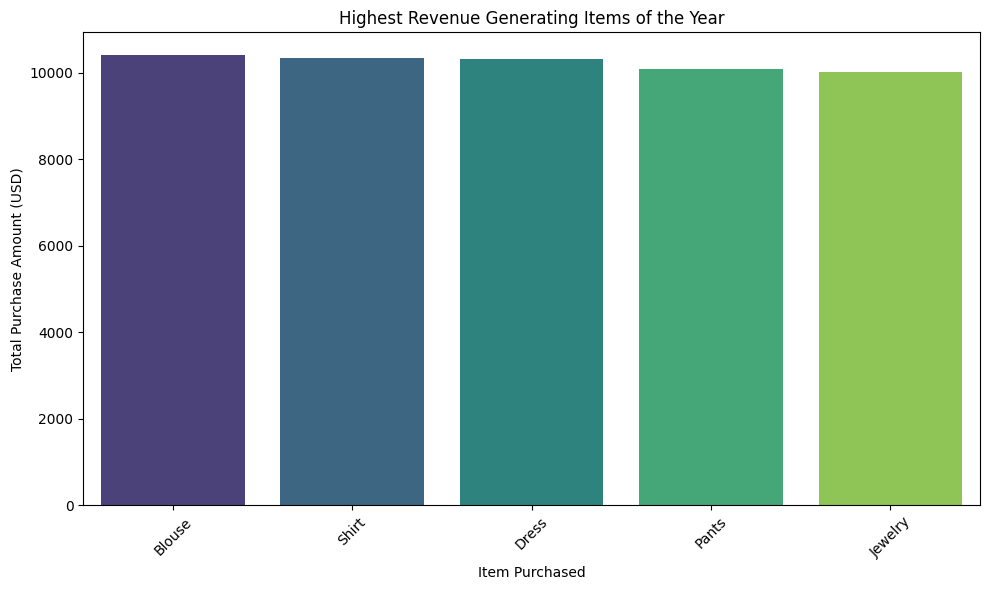

In [54]:
item_sales = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

top_3_items = item_sales.sort_values(by='Purchase Amount (USD)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_items, x='Item Purchased', y='Purchase Amount (USD)', palette='viridis')
plt.title('Highest Revenue Generating Items of the Year')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

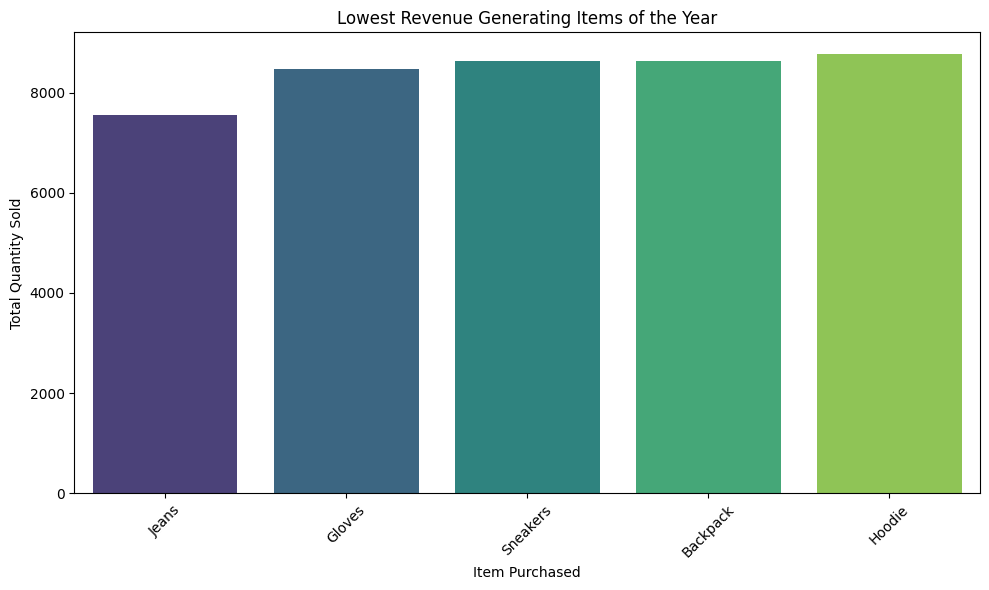

In [55]:
item_sales = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

lowest_5_items = item_sales.sort_values(by='Purchase Amount (USD)', ascending=True).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_5_items, x='Item Purchased', y='Purchase Amount (USD)', palette='viridis')
plt.title('Lowest Revenue Generating Items of the Year')
plt.xlabel('Item Purchased')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

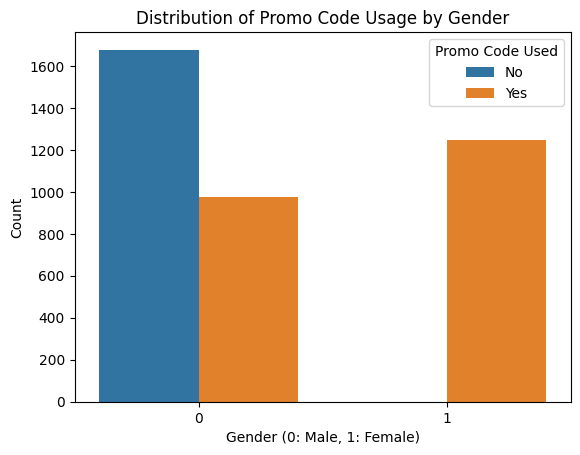

In [56]:
sns.countplot(x='Gender', hue='Promo Code Used', data=shopping_trends)
plt.title('Distribution of Promo Code Usage by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.legend(title='Promo Code Used', labels=['No', 'Yes'])
plt.show()

<font color='white' size=4>**<span style='background:blue'> Females did not use the promo codes, indicating the promo codes may only have been sent to male customers </span>**</font>

In [57]:
filtered_df = shopping_trends[(shopping_trends['Gender'] == 0) & (shopping_trends['Promo Code Used'] == 1)]

count_instances = len(filtered_df)

print("Count of instances where 'Gender' is 0 (male) and 'Promo Code Used' is '1':", count_instances)

Count of instances where 'Gender' is 0 (male) and 'Promo Code Used' is '1': 975


In [58]:
male_promo_codes_not_used = shopping_trends[(shopping_trends['Gender'] == 0) & (shopping_trends['Promo Code Used'] == 1)]

count_male_promo_codes_not_used = len(male_promo_codes_not_used)

print("Count of not using promo codes by males:", count_male_promo_codes_not_used)

Count of not using promo codes by males: 975


In [59]:
male_promo_codes_used = shopping_trends[(shopping_trends['Gender'] == 0) & (shopping_trends['Promo Code Used'] == 0)]

count_male_promo_codes_used = len(male_promo_codes_used)

print("Count of promo codes used by males:", count_male_promo_codes_used)

Count of promo codes used by males: 1677


In [60]:
female_promo_codes_not_used = shopping_trends[(shopping_trends['Gender'] == 1) & (shopping_trends['Promo Code Used'] == 1)]

count_female_promo_codes_not_used = len(female_promo_codes_not_used)

print("Count of not using promo codes by females:", count_male_promo_codes_not_used)

Count of not using promo codes by females: 975


In [61]:
male_promo_codes_used = shopping_trends[(shopping_trends['Gender'] == 1) & (shopping_trends['Promo Code Used'] == 0)]

count_male_promo_codes_used = len(male_promo_codes_used)

print("Count of promo codes used by women:", count_male_promo_codes_used)

Count of promo codes used by women: 0


<span style="color:blue; font-size:30px;">It is noteworthy that women did not use promo codes. This trend indicateds promo codes should instead be sent to all customers, not just males</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [62]:
shipping_type_counts = shopping_trends['Shipping Type'].value_counts()

print("Count of shipping types:")
print(shipping_type_counts)

Count of shipping types:
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


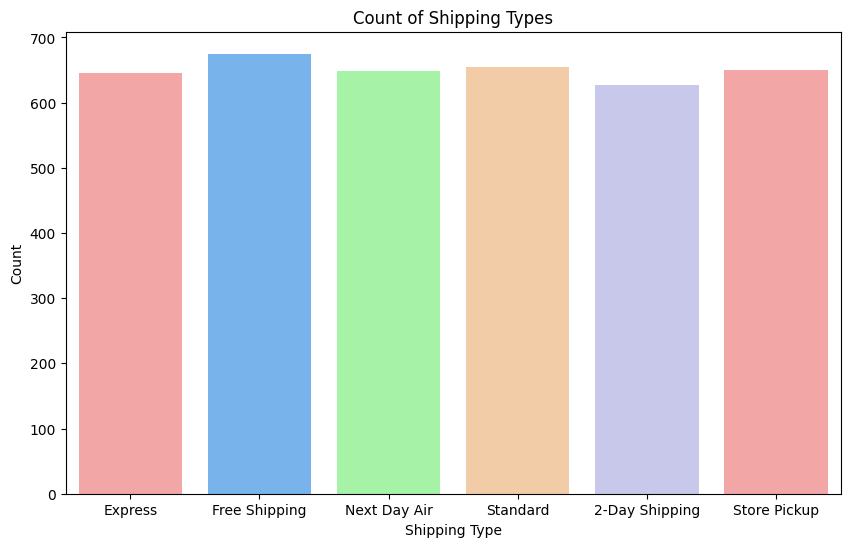

In [63]:
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#C2C2F0"]

plt.figure(figsize=(10, 6))

sns.countplot(x='Shipping Type', data=shopping_trends, palette=colors)

plt.title('Count of Shipping Types')
plt.xlabel('Shipping Type')
plt.ylabel('Count')

plt.show()

In [64]:
males_df = shopping_trends[shopping_trends['Gender'] == 0]
females_df = shopping_trends[shopping_trends['Gender'] == 1]

top_5_males = males_df.nlargest(5, 'Review Rating')['Item Purchased']
top_5_females = females_df.nlargest(5, 'Review Rating')['Item Purchased']

top_5_combined = pd.concat([top_5_males, top_5_females], axis=1)
top_5_combined.columns = ['Top 5 Males', 'Top 5 Females']

print(top_5_combined)

     Top 5 Males Top 5 Females
27        Shorts           NaN
111         Belt           NaN
374      Jewelry           NaN
468     Backpack           NaN
507       Shorts           NaN
2705         NaN        Jacket
2760         NaN         Skirt
2789         NaN       Sweater
2831         NaN        Hoodie
2836         NaN         Pants


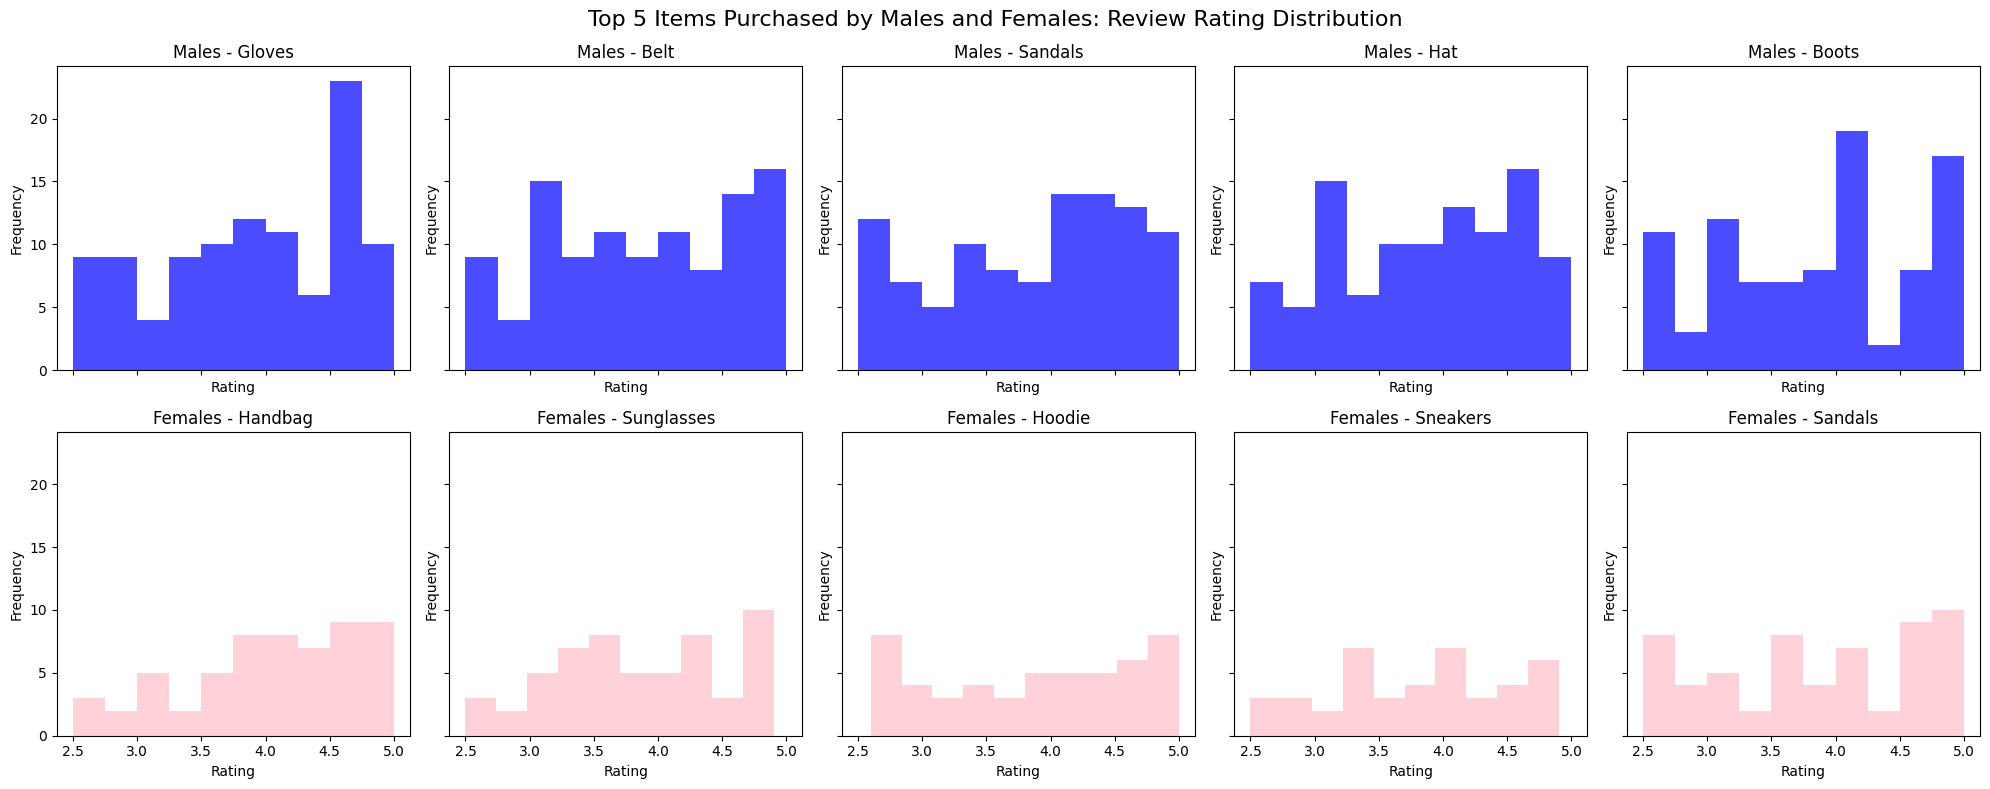

In [65]:
males_df = shopping_trends[shopping_trends['Gender'] == 0]
females_df = shopping_trends[shopping_trends['Gender'] == 1]

top_5_males = males_df.groupby('Item Purchased')['Review Rating'].mean().nlargest(5).index
top_5_females = females_df.groupby('Item Purchased')['Review Rating'].mean().nlargest(5).index

fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)

fig.suptitle('Top 5 Items Purchased by Males and Females: Review Rating Distribution', fontsize=16)

for i, item in enumerate(top_5_males):
    # Plot histogram for males
    males_ratings = males_df[males_df['Item Purchased'] == item]['Review Rating']
    axes[0, i].hist(males_ratings, bins=10, color='blue', alpha=0.7)
    axes[0, i].set_title(f'Males - {item}')
    axes[0, i].set_xlabel('Rating')
    axes[0, i].set_ylabel('Frequency')

for i, item in enumerate(top_5_females):
    females_ratings = females_df[females_df['Item Purchased'] == item]['Review Rating']
    axes[1, i].hist(females_ratings, bins=10, color='pink', alpha=0.7)
    axes[1, i].set_title(f'Females - {item}')
    axes[1, i].set_xlabel('Rating')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<font color='white' size=4>**<span style='background:blue'> This shows the 5 highest rated items for males and females. Males gave strong ratings to gloves, hats, and boots </span>**</font>

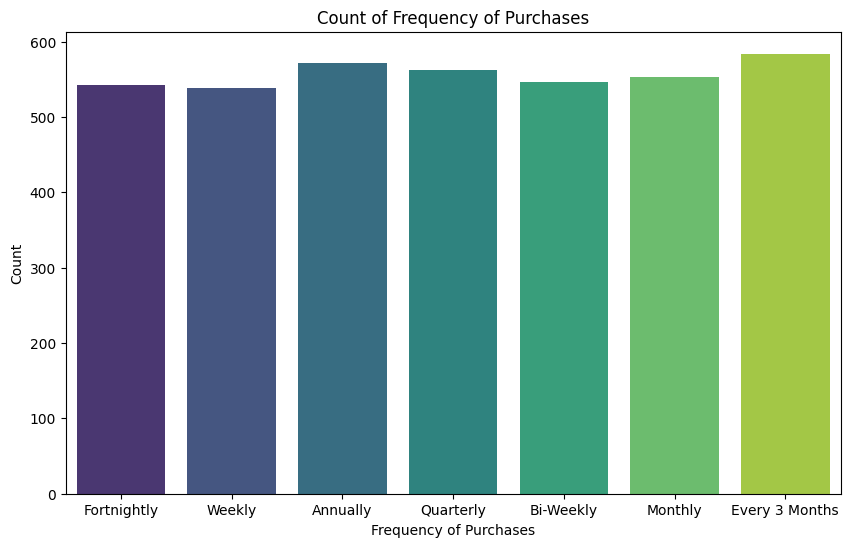

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of Purchases', data=shopping_trends, palette='viridis')

plt.title('Count of Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWa

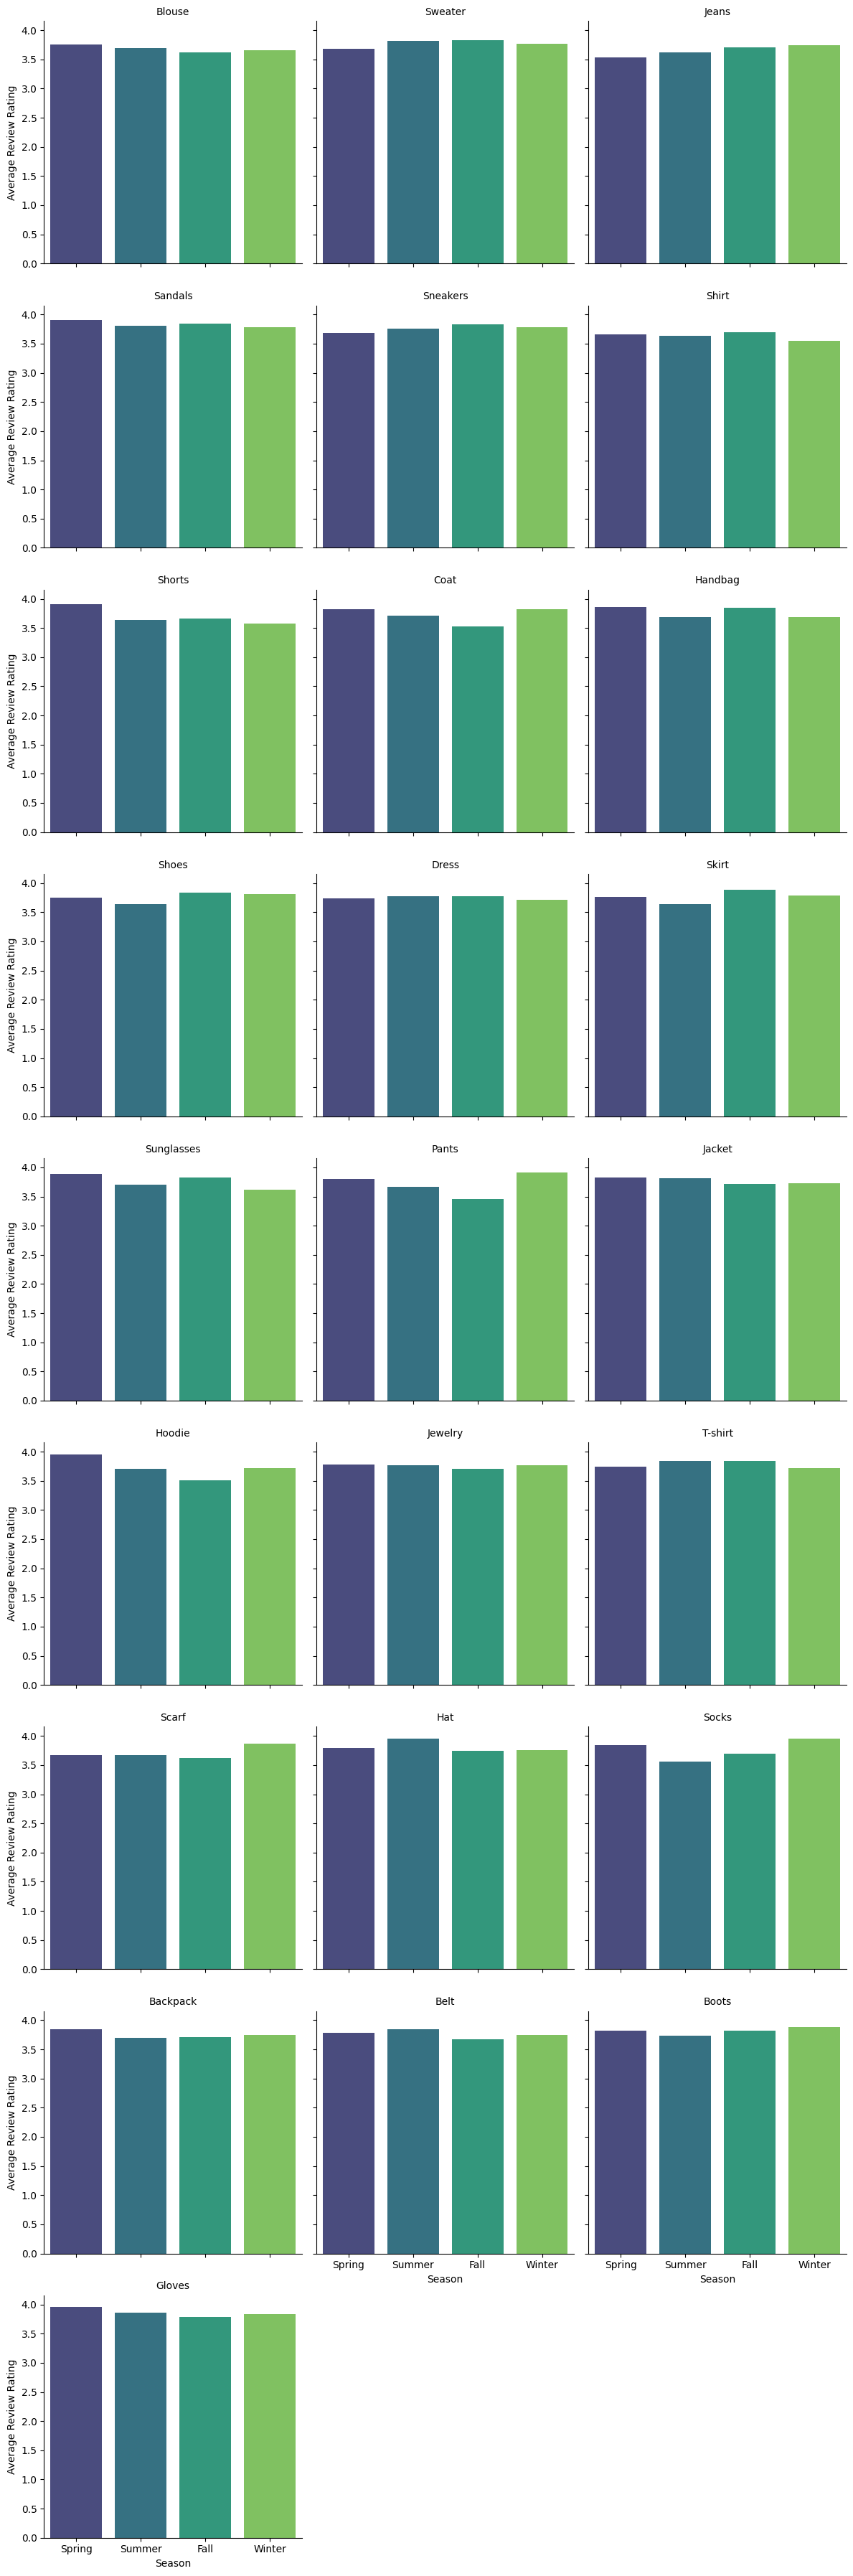

In [67]:
g = sns.FacetGrid(shopping_trends, col='Item Purchased', col_wrap=3, height=4)
g.map(sns.barplot, 'Season', 'Review Rating', palette='viridis', ci=None)

g.set_titles('{col_name}')
g.set_axis_labels('Season', 'Average Review Rating')

plt.tight_layout()

plt.show()

In [68]:
average_rating_per_item = shopping_trends.groupby('Item Purchased')['Review Rating'].mean().reset_index()

print(average_rating_per_item)

   Item Purchased  Review Rating
0        Backpack       3.752448
1            Belt       3.761491
2          Blouse       3.683626
3           Boots       3.812500
4            Coat       3.730435
5           Dress       3.754819
6          Gloves       3.864286
7         Handbag       3.775163
8             Hat       3.806494
9          Hoodie       3.719205
10         Jacket       3.763190
11          Jeans       3.648387
12        Jewelry       3.756140
13          Pants       3.718713
14        Sandals       3.841250
15          Scarf       3.700000
16          Shirt       3.629586
17          Shoes       3.747333
18         Shorts       3.711465
19          Skirt       3.782278
20       Sneakers       3.757931
21          Socks       3.750943
22     Sunglasses       3.744720
23        Sweater       3.767073
24        T-shirt       3.782993


<font color='white' size=4>**<span style='background:blue'> This shows the average review for each item </span>**</font>

<span style="color:blue; font-size:30px;">There were many interestind trends in the data. </span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>